# LCA Disclosure Data for Fiscal Year 2023 Analysis

This notebook contains code and notes to analyze data that has been disclosed by the Office of Foreign Labor Certification under the Employment and Training Administration of the U.S. Department of Labor. The datasets used have been downloaded directly from the LCA Programs (H-1B, H-1B1, E-3) under the Performance Data tab of the webpage linked [here](https://www.dol.gov/agencies/eta/foreign-labor/performance).

The aim of this analysis is to extract key insights related to the H-1B program. My hope is to bring this data to the people in the form of informative visualizations. I hope to share key information regarding items such as job titles, employer names, job classifications, industry classifications, and prevailing wages for specific job positions, among many other key features.

A certified Labor Condition Application (LCA) is a requirement that must be obtained prior to the submission of an employer's H-1B visa petition on behalf of an employee (or beneficiary). This application is completed by the filing of Form 9035 to the Department of Labor, and its purpose is to for employers to testify that the workers for whom this application is being completed are performing in safe working conditions and are being compensated fairly, among other reasons detailed by the Department of Labor. The Office of Foreign Labor Certification is mandated to release the data obtained from this form for public use. 

As I have provided the context that details at what point during an H-1B visa petition this application is completed, it is important to note that the data used in this analysis should not be confused with the H-1B visa petition data released by the United States Citizenship and Immigration Services (USCIS). This dataset 

Using this data as the basis of an H-1B analysis is part of an effort to obtain as much data as possible that is relevant to the H-1B program in order to better inform those who are pursuing the program as a path to securing temporary and full-time employment opportunities in the U.S. 

In [3]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import express as px
from plotly import graph_objects as go
import dash
from dash import dcc
from dash import html
import string

In [4]:
# Start a timer, read in the data, copy the dataset, and display the duration

start_time = datetime.datetime.now()

initial_data = pd.read_excel('/Users/tinashem/Github Repos/CareerPalz/files/LCA_Disclosure_Data_FY2023_final_copy.xlsx')

data = initial_data.copy()

end_time = datetime.datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:15:13.283342


A peak into this dataset will reveal what each singular row looks like.

In [5]:
# Preview the first 5 rows of the dataset
data.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,NaN,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Sheppard,Kaitlyn (11606.425.22),NaN,Berry Appleman & Leiden LLP,ksheppard@bal.com
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


Inspecting the dataset further will help reveal how many entries (or rows) that it has, how many columns are contained within the dataset, the data types of the columns, and how many records have entries that are *not null* for that specific column (in other words, how many records have values that have been entered).

In [6]:
# Preview the information from all of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644607 entries, 0 to 644606
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     644607 non-null  object        
 1   CASE_STATUS                     644607 non-null  object        
 2   RECEIVED_DATE                   644607 non-null  datetime64[ns]
 3   DECISION_DATE                   644607 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              17250 non-null   datetime64[ns]
 5   VISA_CLASS                      644607 non-null  object        
 6   JOB_TITLE                       644607 non-null  object        
 7   SOC_CODE                        644607 non-null  object        
 8   SOC_TITLE                       644607 non-null  object        
 9   FULL_TIME_POSITION              644607 non-null  object        
 10  BEGIN_DATE                      644607 non-null  datetim

Key columns for our analysis include CASE_STATUS, VISA_CLASS, JOB_TITLE, SOC_CODE, SOC_TITLE, FULL_TIME_POSITION, NEW_EMPLOYMENT, EMPLOYER_NAME, EMPLOYER_CITY, EMPLOYER_STATE, EMPLOYER_PHONE, NAICS_CODE, PREVAILING_WAGE, PW_UNIT_OF_PAY, and others that might be added to the analysis in the future.

EMPLOYER_STATE contains less entries in its column than the 644,607 entries that have been indicated as the dataset's total number of rows. From the number shown above i.e. 644,409, this implies that 198 entries in this column are either __null__ or __empty__. Since we are at an early point in the analysis, I will choose to move forward without investigating the null values further.

Let's check what data type each of the JOB_TITLE entries are, using the first entry.

In [7]:
type(data['JOB_TITLE'].values[0])

str

Now we will know what methods to use to clean the data in the JOB_TITLE column. In our next code cell, we are cleaning the strings by checking if each entry has whitespace characters at the start of the string, as well as at the end of the string.

In [8]:
# Strip the leading and trailing white spaces from the job title entries in the dataset
data['JOB_TITLE'] = [x.lstrip().rstrip() for x in data['JOB_TITLE']]

Moving onto the NEW_EMPLOYMENT column, let's investigate how data has been entered here.

In [9]:
# Check how many unique values are in the 'NEW_EMPLOYMENT' column
print(f"There are {data['NEW_EMPLOYMENT'].nunique()} unique values in the 'NEW_EMPLOYMENT' column")

There are 48 unique values in the 'NEW_EMPLOYMENT' column


In [10]:
data['NEW_EMPLOYMENT'].unique()

array([   0,    1,    3,    5,    2,   50,   75,   12,   25,   20,    4,
         30,   10,   22,    8,    6,   13,   15,    7,  300,  100,   37,
          9,   14,  223, 1098,   11,   40,   60,   80,   33,   27,   21,
         35,   70,   19,   26,  250,   28,   17,   24,   99,   41,  150,
         18,   32,   29,   23])

This shows us how the NEW_EMPLOYMENT values were populated. I understood this to mean that when an employer is applying for certification of an LCA, they must enter a figure that denotes the number of *_new_* employees for whom they intend to file visa petitions for a specified position.

In [11]:
data['NEW_EMPLOYMENT'].value_counts()

NEW_EMPLOYMENT
0       436195
1       191452
5         4133
2         2743
10        2726
4         1489
30        1191
50         988
6          981
3          636
100        521
75         416
20         413
25         244
15         182
8           56
7           45
12          43
70          25
40          20
60          19
9           11
11           9
21           6
18           6
250          6
150          6
300          5
35           5
99           3
13           3
14           3
17           3
41           2
32           2
29           2
23           2
26           2
27           2
80           2
22           2
28           1
19           1
24           1
33           1
1098         1
37           1
223          1
Name: count, dtype: int64

We have two columns from this code cell. On the left are the unique figures that were entered in the NEW_EMPLOYMENT column. On the right is the number of times that each of these unique figures appears in this dataset. 

For example, the number of cases for which the NEW_EMPLOYMENT figure was 0 totaled to 436,195. Following on from that, I understood this to mean that these 436,195 data points cannot be used in an analysis of job positions pertaining to new employment.

We will now filter out these data points, along with data points for part-time positions.

In [12]:
# let's create a separate data frame for entries that have new employment and are full-time positions
new_employment = data[(data['NEW_EMPLOYMENT'] != 0) & (data['FULL_TIME_POSITION'] == 'Y')]
new_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205351 entries, 3 to 644597
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     205351 non-null  object        
 1   CASE_STATUS                     205351 non-null  object        
 2   RECEIVED_DATE                   205351 non-null  datetime64[ns]
 3   DECISION_DATE                   205351 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              6199 non-null    datetime64[ns]
 5   VISA_CLASS                      205351 non-null  object        
 6   JOB_TITLE                       205351 non-null  object        
 7   SOC_CODE                        205351 non-null  object        
 8   SOC_TITLE                       205351 non-null  object        
 9   FULL_TIME_POSITION              205351 non-null  object        
 10  BEGIN_DATE                      205351 non-null  datetime64[n

Here, we can see that 205,351 entries are present. Since our analysis intends to focus on certified applications, let's investigate the different entries in the CASE_STATUS column.

In [13]:
# let's investigate how many new employers had certified LCA's
new_employment['CASE_STATUS'].unique()

array(['Certified - Withdrawn', 'Withdrawn', 'Denied', 'Certified'],
      dtype=object)

We will now filter out the data to include only cases whose LCAs were certified.

In [14]:
# let's investigate how many new employers had certified LCA's
certified = new_employment[new_employment['CASE_STATUS'] == 'Certified']
certified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186524 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     186524 non-null  object        
 1   CASE_STATUS                     186524 non-null  object        
 2   RECEIVED_DATE                   186524 non-null  datetime64[ns]
 3   DECISION_DATE                   186524 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      186524 non-null  object        
 6   JOB_TITLE                       186524 non-null  object        
 7   SOC_CODE                        186524 non-null  object        
 8   SOC_TITLE                       186524 non-null  object        
 9   FULL_TIME_POSITION              186524 non-null  object        
 10  BEGIN_DATE                      186524 non-null  datetime64

186,524 rows are present in this dataset. For our notebook, we will need to limit how many rows appear in a singular view of the output of each code cell, to 20 rows.

In [15]:
# display a maximum of 20 rows
pd.set_option("display.max_rows", 20)

Since we have narrowed down the dataset to certified LCAS, let's begin looking at the job titles.

In [16]:
# let's look at how many different job titles were given certified LCA's
certified['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                              11737
Software Developer                                              8171
Assistant Professor                                             2662
SOFTWARE DEVELOPER                                              2317
Software Development Engineer I                                 2053
                                                               ...  
Precision  Oncology Scientific Prog Manager-Staff Scientist        1
Factory Manager                                                    1
SOTWARE DEVELOPER                                                  1
Campus Advocate                                                    1
Financial Model Development Senior                                 1
Name: count, Length: 40597, dtype: int64

In [17]:
# let's look at the SOC_TITLE for the certified LCA's
certified['SOC_TITLE'].value_counts()

SOC_TITLE
Software Developers                                 51658
Computer Systems Analysts                            7650
Computer Systems Engineers/Architects                7567
Data Scientists                                      4840
Information Technology Project Managers              4653
                                                    ...  
Telecommunications Line Installers and Repairers        1
MANAGEMENT ANALYSTS                                     1
MICROBIOLOGIST                                          1
EDUCATION TEACHERS, POSTSECONDARY                       1
INSTRUCTIONAL COORDINATOR                               1
Name: count, Length: 734, dtype: int64

In [18]:
# Were they all H-1B visas?
certified['VISA_CLASS'].value_counts()

VISA_CLASS
H-1B               180307
E-3 Australian       4096
H-1B1 Chile          1340
H-1B1 Singapore       781
Name: count, dtype: int64

In [19]:
certified_h1b = certified[certified['VISA_CLASS'] == 'H-1B']
certified_h1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180307 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     180307 non-null  object        
 1   CASE_STATUS                     180307 non-null  object        
 2   RECEIVED_DATE                   180307 non-null  datetime64[ns]
 3   DECISION_DATE                   180307 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      180307 non-null  object        
 6   JOB_TITLE                       180307 non-null  object        
 7   SOC_CODE                        180307 non-null  object        
 8   SOC_TITLE                       180307 non-null  object        
 9   FULL_TIME_POSITION              180307 non-null  object        
 10  BEGIN_DATE                      180307 non-null  datetime64

In [20]:
certified_h1b['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                            11616
Software Developer                            8141
Assistant Professor                           2654
SOFTWARE DEVELOPER                            2301
Software Development Engineer I               2047
                                             ...  
Assist Manager - IT Security                     1
DATA SCIENCE AND VISUALIZATION ANALYST BI        1
Applications Support Engineer                    1
Physician - Anesthesiology                       1
Financial Model Development Senior               1
Name: count, Length: 38549, dtype: int64

In [21]:
# let's use the SOC_CODE to isolate software developers from the certified LCA's
software_developers = certified_h1b[certified_h1b['SOC_CODE'].str.startswith('15-1252')]
print(f"There are {software_developers['JOB_TITLE'].nunique():,} different job titles that were entered for LCA's classified as software developers.")

There are 6,151 different job titles that were entered for LCA's classified as software developers.


In [22]:
# let's look at the different job titles for software developers 
software_developers['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                      10797
Software Developer                      7934
SOFTWARE DEVELOPER                      2273
Software Development Engineer I         2020
SOFTWARE ENGINEER                       1561
                                       ...  
Software Engineeer                         1
Apigee Developer/Software Developer        1
UX Researcher                              1
Web Development and Data Analyst           1
J2EE Developer Senior                      1
Name: count, Length: 6151, dtype: int64

That's a lot of different job titles to look at for the Software Developers classification. Let's look at what proportion of the H-1B LCA's were certified to Software Developers.

In [23]:
# let's look at how many times the SOC code for software developers shows up among the certified LCAs for H-1B applications
print(f"Out of the {certified_h1b.shape[0]:,} unique SOC codes, there are {software_developers.shape[0]:,} certified LCA's for H-1B applications that are classified as software developers.")

Out of the 180,307 unique SOC codes, there are 51,230 certified LCA's for H-1B applications that are classified as software developers.


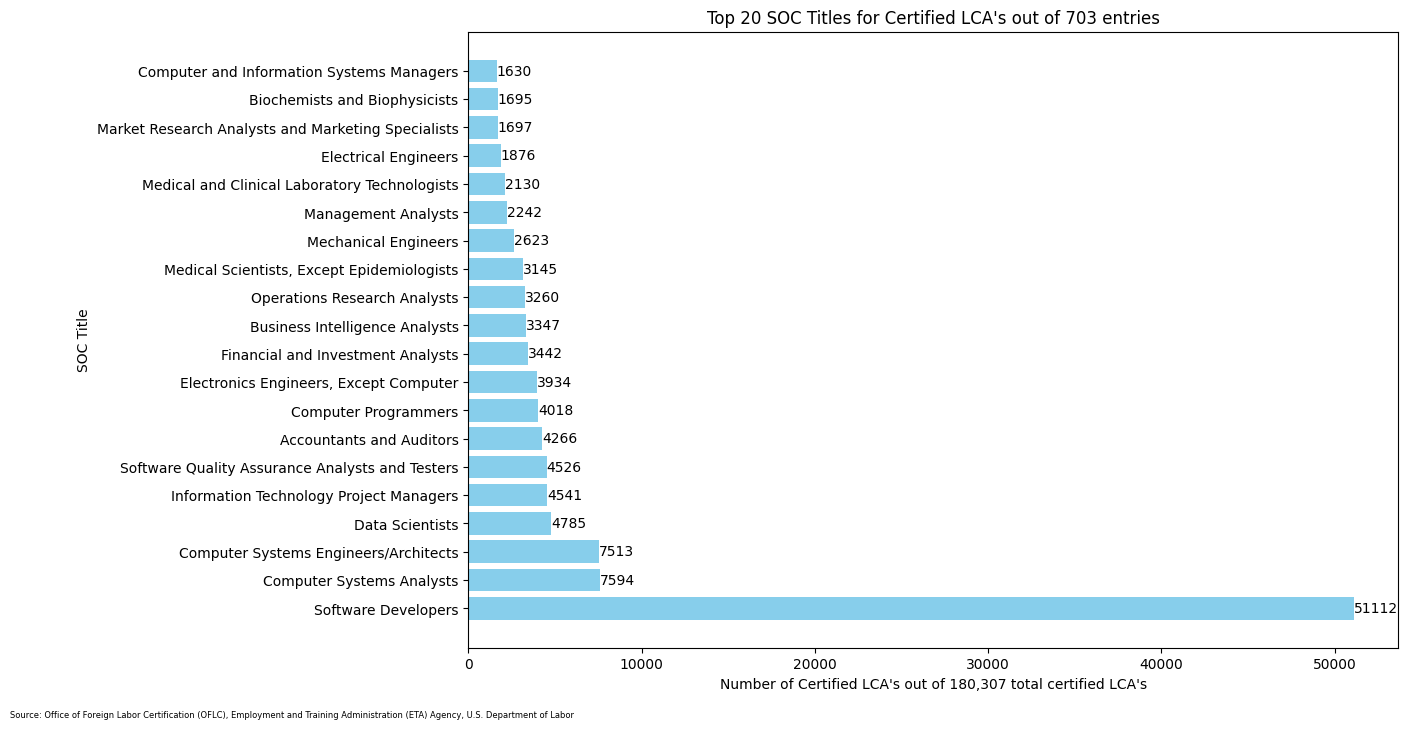

In [24]:
# let's plot a bar graph of the different SOC titles that appear in the dataset for certified H-1B LCA's for all employers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(certified_h1b['SOC_TITLE'].value_counts()[0:20].index, certified_h1b['SOC_TITLE'].value_counts()[0:20].values, color='skyblue');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 SOC Titles for Certified LCA\'s out of {certified_h1b['SOC_TITLE'].nunique():,} entries');
ax.set_ylabel('SOC Title');
ax.set_xlabel(f'Number of Certified LCA\'s out of {certified_h1b.shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [25]:
# Let's use a new file downloaded from the DOL website to cross-validate the data entered in the SOC_TITLE column
soc_definitions = pd.read_excel('/Users/tinashem/Downloads/soc_2018_definitions_detailed_occupations.xlsx')

soc_definitions.head()

,SOC_GROUP,SOC_CODE,SOC_TITLE,SOC_DEFINITION
0,Major,11-0000,Management Occupations,NaN
1,Minor,11-1000,Top Executives,NaN
2,Broad,11-1010,Chief Executives,NaN
3,Detailed,11-1011,Chief Executives,Determine and formulate policies and provide o...
4,Broad,11-1020,General and Operations Managers,NaN


In [26]:
# let's narrow down the soc_definitions data frame to only the entries categorized as "Detailed" for the SOC_GROUP
soc_definitions_detailed = soc_definitions[soc_definitions['SOC_GROUP'] == 'Detailed']
soc_definitions_detailed.head()

,SOC_GROUP,SOC_CODE,SOC_TITLE,SOC_DEFINITION
3,Detailed,11-1011,Chief Executives,Determine and formulate policies and provide o...
5,Detailed,11-1021,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
7,Detailed,11-1031,Legislators,"Develop, introduce, or enact laws and statutes..."
10,Detailed,11-2011,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
12,Detailed,11-2021,Marketing Managers,"Plan, direct, or coordinate marketing policies..."


In [27]:
# let's check to see for any null values
soc_definitions_detailed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 3 to 1446
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SOC_GROUP       867 non-null    object
 1   SOC_CODE        867 non-null    object
 2   SOC_TITLE       867 non-null    object
 3   SOC_DEFINITION  867 non-null    object
dtypes: object(4)
memory usage: 33.9+ KB


In [28]:
# let's check for data types
for col in soc_definitions_detailed.columns:
    print(f"{col}: {soc_definitions_detailed[col].values[0]}: {type(soc_definitions_detailed[col].values[0])}")

SOC_GROUP: Detailed: <class 'str'>
SOC_CODE: 11-1011: <class 'str'>
SOC_TITLE: Chief Executives: <class 'str'>
SOC_DEFINITION: Determine and formulate policies and provide overall direction of companies or private and public sector organizations within guidelines set up by a board of directors or similar governing body. Plan, direct, or coordinate operational activities at the highest level of management with the help of subordinate executives and staff managers.: <class 'str'>


In [29]:
# Now that we know that the data types match, let's cross-validate the entries in the SOC_TITLE column of the certified_h1b data frame with the SOC_TITLE column of the soc_definitions_detailed data frame

# let's start by printing out the number of SOC titles in the certified_h1b data frame
print(f"There are {certified_h1b['SOC_TITLE'].nunique():,} unique SOC titles in the certified_h1b data frame.")

# let's print out the number of SOC titles in the soc_definitions_detailed data frame
print(f"There are {soc_definitions_detailed['SOC_TITLE'].nunique():,} unique SOC titles in the soc_definitions_detailed data frame.")

There are 703 unique SOC titles in the certified_h1b data frame.
There are 867 unique SOC titles in the soc_definitions_detailed data frame.


In [30]:
# This is less than the 867 unique SOC titles in the soc_definitions_detailed data frame, so let's cross-validate the two data frames
certified_h1b_soc_titles = certified_h1b['SOC_TITLE'].unique()
soc_definitions_detailed_soc_titles = soc_definitions_detailed['SOC_TITLE'].unique()

# let's find the SOC titles that are in the certified_h1b data frame but not in the soc_definitions_detailed data frame
missing_from_certified_h1b = [title for title in certified_h1b_soc_titles if title not in soc_definitions_detailed_soc_titles]
print(f"There are {len(missing_from_certified_h1b):,} SOC titles in the certified_h1b data frame that are not in the soc_definitions_detailed data frame.")

# let's find the SOC titles that are in the soc_definitions_detailed data frame but not in the certified_h1b data frame
missing_from_soc_definitions = [title for title in soc_definitions_detailed_soc_titles if title not in certified_h1b_soc_titles]
print(f"There are {len(missing_from_soc_definitions):,} SOC titles in the soc_definitions_detailed data frame that are not in the certified_h1b data frame.")

# let's find the SOC titles that are in both the certified_h1b data frame and the soc_definitions_detailed data frame
common_soc_titles = [title for title in certified_h1b_soc_titles if title in soc_definitions_detailed_soc_titles]
print(f"There are {len(common_soc_titles):,} SOC titles that are in both the certified_h1b data frame and the soc_definitions_detailed data frame.")

There are 274 SOC titles in the certified_h1b data frame that are not in the soc_definitions_detailed data frame.
There are 438 SOC titles in the soc_definitions_detailed data frame that are not in the certified_h1b data frame.
There are 429 SOC titles that are in both the certified_h1b data frame and the soc_definitions_detailed data frame.


In [31]:
print(f"The first 10 SOC titles that are in the certified_h1b df that are not in the soc_definitions_detailed df are {missing_from_certified_h1b[:10]}")

The first 10 SOC titles that are in the certified_h1b df that are not in the soc_definitions_detailed df are ['Computer Systems Engineers/Architects', 'Business Intelligence Analysts', 'Regulatory Affairs Specialists', 'Molecular and Cellular Biologists', 'Information Security Engineers', 'Data Warehousing Specialists', 'Bioinformatics Scientists', 'Information Technology Project Managers', 'Software Quality Assurance Engineers and Testers', 'Validation Engineers']


In [32]:
missing_from_certified_h1b[0] in soc_definitions_detailed_soc_titles

False

After looking through some of the entries in the two dataframes being investigated, it appears that some entries in the certified_h1b dataframe are not in the soc_definitions_detailed dataframe, likely due to incorrect entry. For example, "Software Quality Assurance Analysts and Testers" is incorrectly entered as "Software Quality Assurance Engineers and Testers". Another example, "Business Intelligence Analysts" and "Bioinformatics Scientists" are not in the SOC Definitions.

I have decided to remove these entries from the certified_h1b dataframe.

In [33]:
# let's drop the rows in the certified_h1b data frame that have SOC titles that are not in the soc_definitions_detailed data frame
certified_h1b_renewed = certified_h1b.copy()
certified_h1b_renewed = certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'].isin(common_soc_titles)]
print(f"There are {certified_h1b_renewed['SOC_TITLE'].nunique():,} unique SOC titles in the certified_h1b_renewed data frame.")

There are 429 unique SOC titles in the certified_h1b_renewed data frame.


In [34]:
# Let's take a look at our new data frame
certified_h1b_renewed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154453 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     154453 non-null  object        
 1   CASE_STATUS                     154453 non-null  object        
 2   RECEIVED_DATE                   154453 non-null  datetime64[ns]
 3   DECISION_DATE                   154453 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      154453 non-null  object        
 6   JOB_TITLE                       154453 non-null  object        
 7   SOC_CODE                        154453 non-null  object        
 8   SOC_TITLE                       154453 non-null  object        
 9   FULL_TIME_POSITION              154453 non-null  object        
 10  BEGIN_DATE                      154453 non-null  datetime64

In [35]:
# let's see how many rows were dropped
print(f"{certified_h1b.shape[0] - certified_h1b_renewed.shape[0]:,} rows were dropped from the certified_h1b data frame.")

25,854 rows were dropped from the certified_h1b data frame.


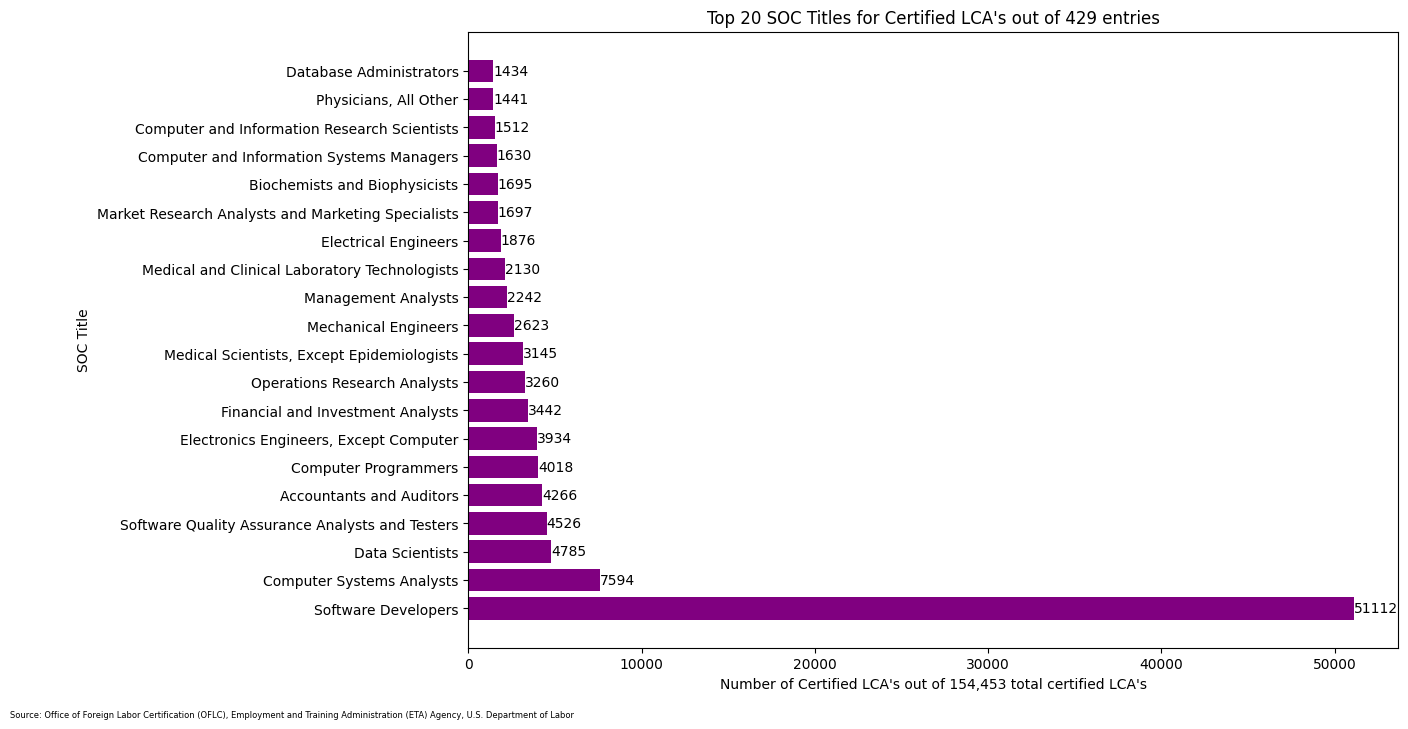

In [36]:
# let's plot a bar graph of the different SOC titles that appear in the RENEWED dataset for certified H-1B LCA's for all employers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(certified_h1b_renewed['SOC_TITLE'].value_counts()[0:20].index, certified_h1b_renewed['SOC_TITLE'].value_counts()[0:20].values, color='purple');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 SOC Titles for Certified LCA\'s out of {certified_h1b_renewed['SOC_TITLE'].nunique():,} entries');
ax.set_ylabel('SOC Title');
ax.set_xlabel(f'Number of Certified LCA\'s out of {certified_h1b_renewed.shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

By sheer numbers, we can see that Software Developers account for almost $\frac{1}{3}$ of the $429$ different SOC titles listed in the dataset. 

In [37]:
print(f"There are {certified_h1b_renewed.shape[0]:,} certified LCA's for H-1B applications whose SOC titles were accurately entered.")
print(f"There are {certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Software Developers']['JOB_TITLE'].nunique():,} different job titles that were entered for LCA's classified as software developers.")

There are 154,453 certified LCA's for H-1B applications whose SOC titles were accurately entered.
There are 6,131 different job titles that were entered for LCA's classified as software developers.


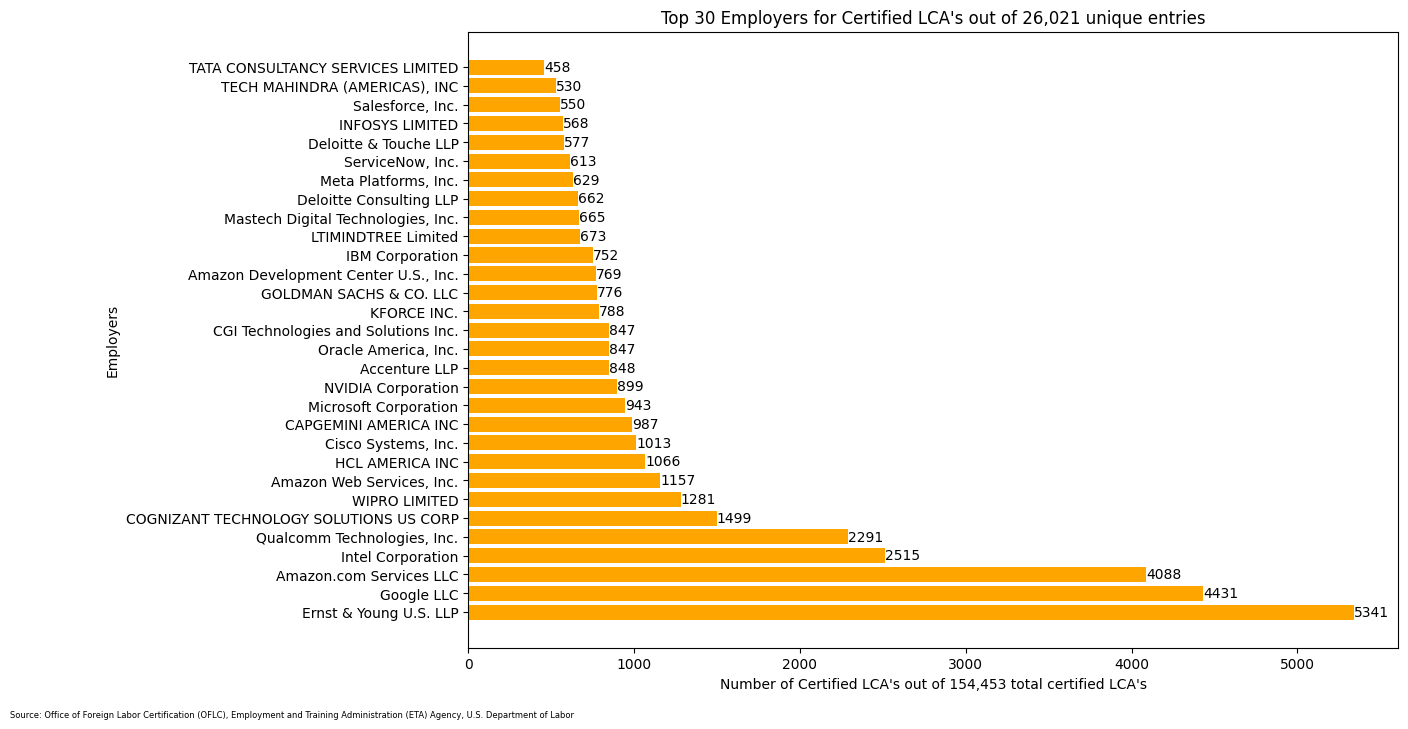

In [38]:
# let's plot a bar graph of the different employer names that appear in the RENEWED dataset for certified H-1B LCA's for all employers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(certified_h1b_renewed['EMPLOYER_NAME'].value_counts()[0:30].index, certified_h1b_renewed['EMPLOYER_NAME'].value_counts()[0:30].values, color='orange');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 30 Employers for Certified LCA\'s out of {certified_h1b_renewed['EMPLOYER_NAME'].nunique():,} unique entries');
ax.set_ylabel('Employers');
ax.set_xlabel(f'Number of Certified LCA\'s out of {certified_h1b_renewed.shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

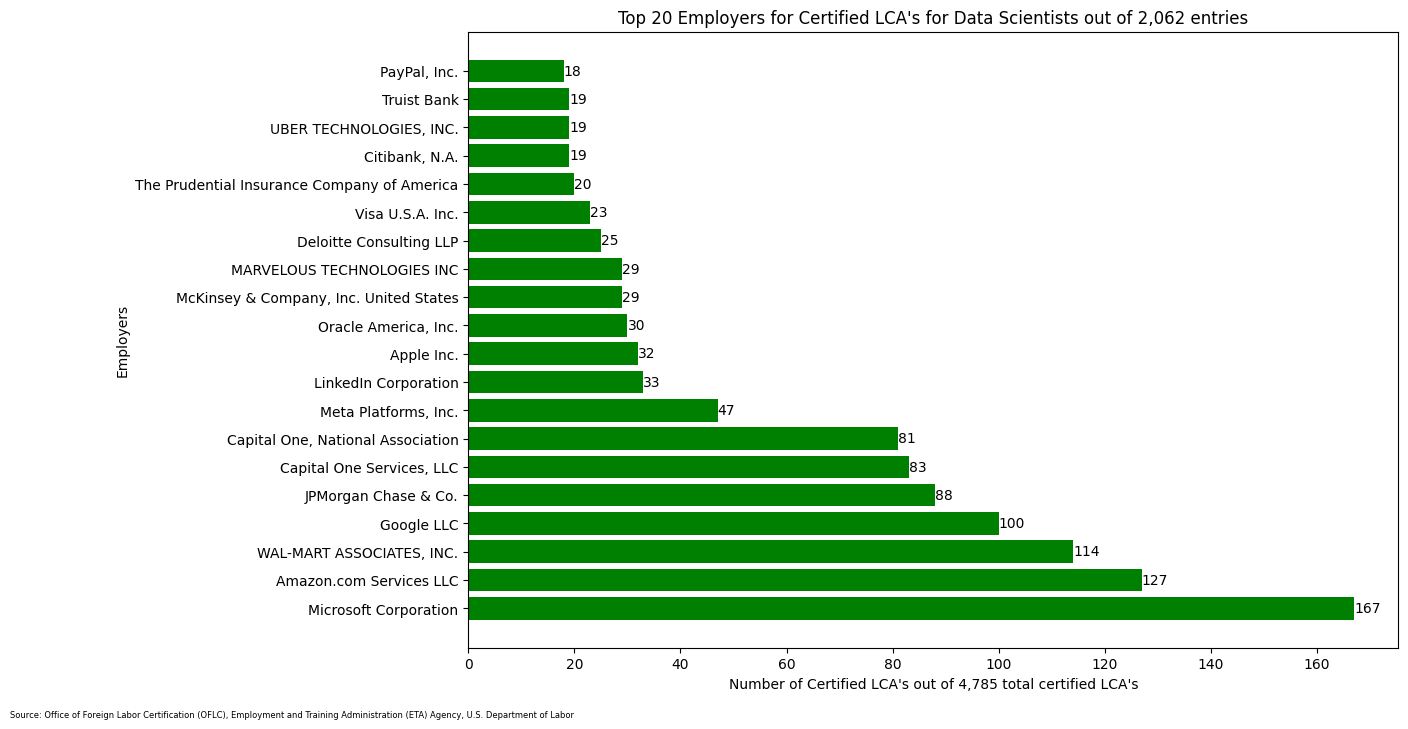

In [39]:
# Let's plot a bar graph that displays the top 20 employers for the SOC title "Data Scientists"
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Data Scientists']['EMPLOYER_NAME'].value_counts()[0:20].index, 
        certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Data Scientists']['EMPLOYER_NAME'].value_counts()[0:20].values, color='green');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 Employers for Certified LCA\'s for Data Scientists out of {certified_h1b_renewed[certified_h1b_renewed["SOC_TITLE"] == "Data Scientists"]["EMPLOYER_NAME"].nunique():,} entries');
ax.set_ylabel('Employers');
ax.set_xlabel(f'Number of Certified LCA\'s out of {certified_h1b_renewed[certified_h1b_renewed["SOC_TITLE"] == "Data Scientists"].shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

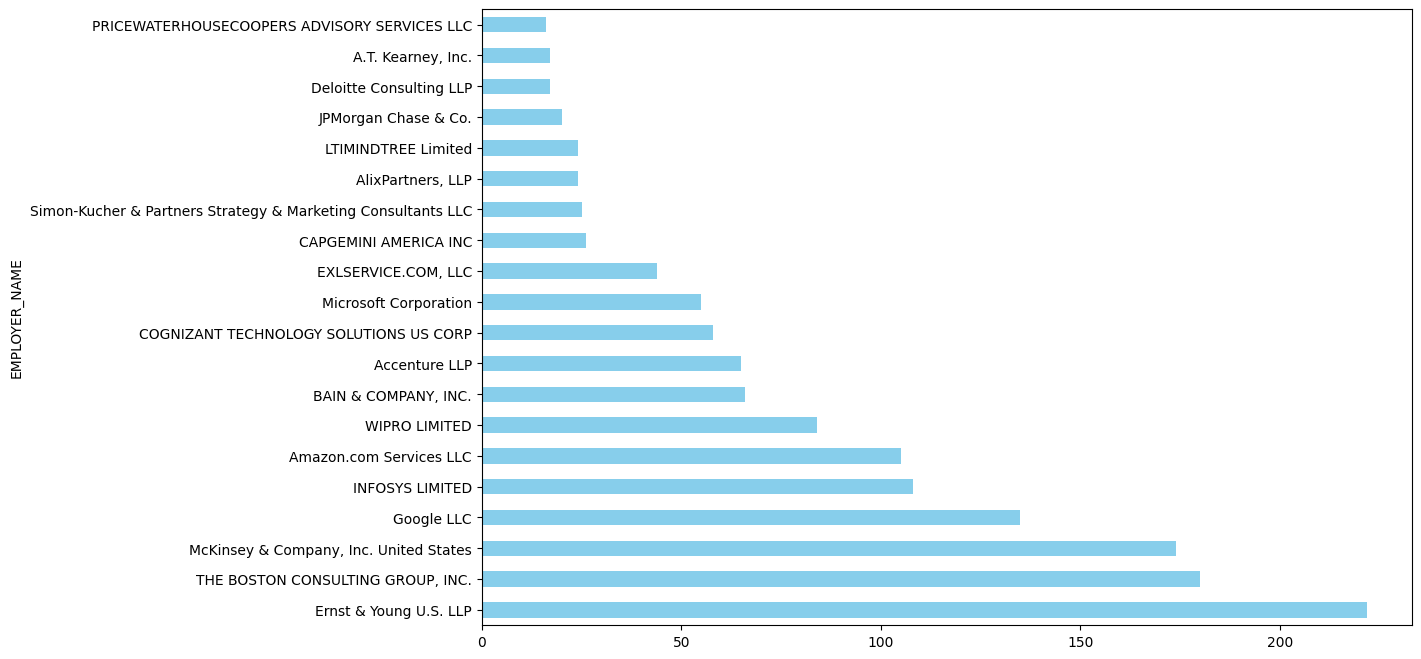

In [40]:
# index 14 and 17 appear to be non-STEM related, so let's investigate further by looking at the Employer Names
non_stem = certified_h1b[certified_h1b['SOC_TITLE'].isin(['Management Analysts', 'Market Research Analysts and Marketing Specialists'])]
non_stem['EMPLOYER_NAME'].value_counts()[0:20].plot(kind='barh', figsize=(12, 8), color='skyblue');

TODO: GitHub Copilot suggested using 15-1132 as the SOC_CODE for software developers. according to the SOC manual, it's 15-1252. Submit this correction to GitHub Copilot.

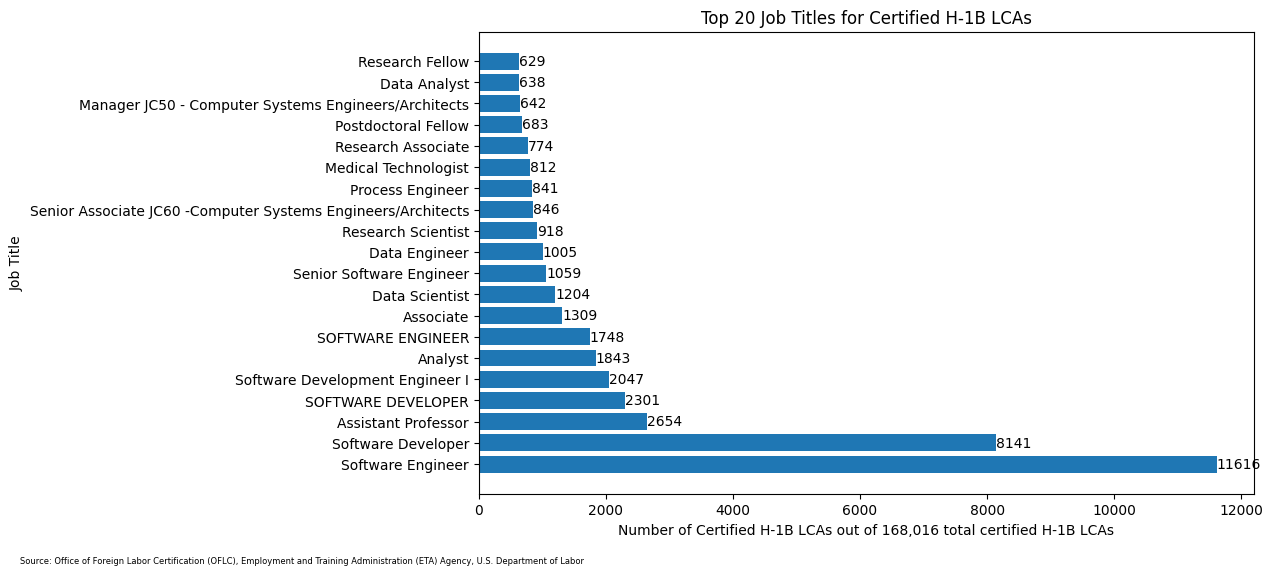

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b['CASE_NUMBER'].nunique():,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

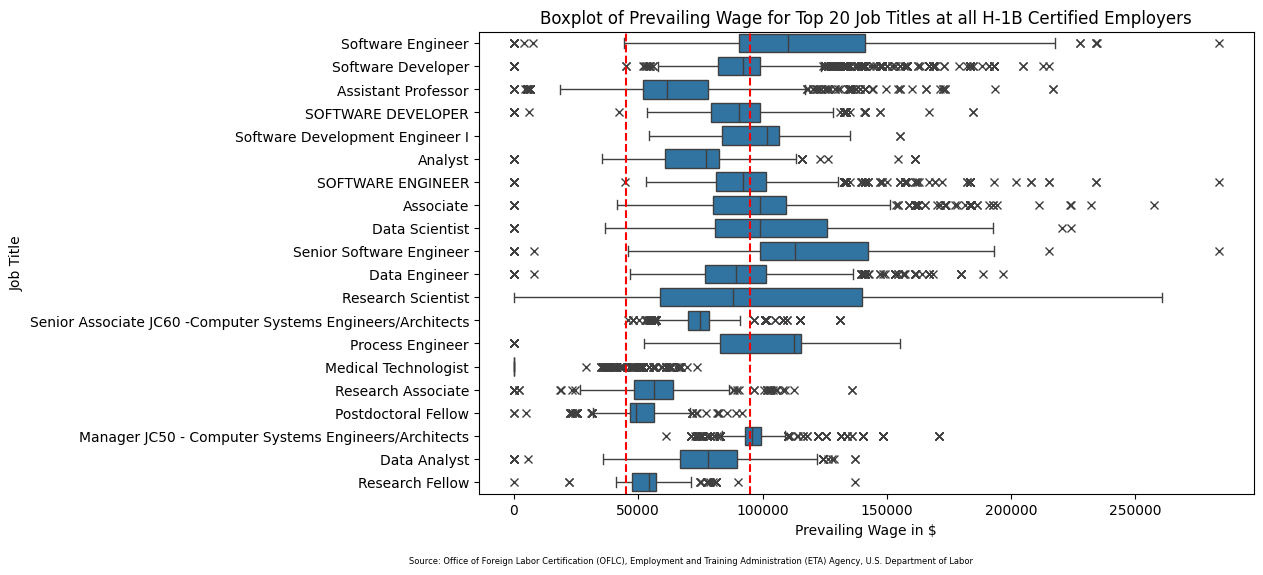

In [42]:
# Let's use the Seaborn package to create a boxplot of the PREVAILING_WAGE values for the top 20 jobs at colleges and universities
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='PREVAILING_WAGE', y='JOB_TITLE', 
            data=certified_h1b, order=certified_h1b['JOB_TITLE'].value_counts()[0:20].index, 
            ax=ax,
            flierprops={"marker": "x"});
ax.set_title('Boxplot of Prevailing Wage for Top 20 Job Titles at all H-1B Certified Employers');
ax.set_xlabel('Prevailing Wage in $');
ax.set_ylabel('Job Title');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-50,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

plt.axvline(x=45000, color='red', linestyle='--');
plt.axvline(x=95000, color='red', linestyle='--');

In [43]:
# Let's use the Plotly Graph Objects to create a boxplot of the PREVAILING_WAGE values for the top 20 job titles in the certified H-1B LCAs dataset
fig = go.Figure()
for job in certified_h1b['JOB_TITLE'].value_counts()[0:10].index:
    fig.add_trace(go.Box(x=certified_h1b[certified_h1b['JOB_TITLE'] == job]['PREVAILING_WAGE'], name=job))
fig.update_layout(title='Boxplot of Prevailing Wage for Top 20 Job Titles at all H-1B Certified Employers',
                  xaxis_title='Prevailing Wage in $',
                  yaxis_title='Job Title',
                  showlegend=False)
# fig.add_annotation(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xref='paper', yref='paper', x=0, y=0, xshift=-50, yshift=-50, font_size=6)
fig.show()

In [44]:
certified_h1b['PREVAILING_WAGE'].info()

<class 'pandas.core.series.Series'>
Index: 180307 entries, 185 to 633892
Series name: PREVAILING_WAGE
Non-Null Count   Dtype  
--------------   -----  
180306 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


In [45]:
# let's see what the prevailing wage was for all of the entries whose unit of pay was the 'Year'
# certified_h1b_year = certified_h1b[certified_h1b['PW_UNIT_OF_PAY'] == 'Year']
# certified_h1b_year.info()

In [46]:
# let's see what the prevailing wage was for all of the entries whose unit of pay was the 'Year'
certified_h1b_year = certified_h1b_renewed[certified_h1b_renewed['PW_UNIT_OF_PAY'] == 'Year']
certified_h1b_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146315 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     146315 non-null  object        
 1   CASE_STATUS                     146315 non-null  object        
 2   RECEIVED_DATE                   146315 non-null  datetime64[ns]
 3   DECISION_DATE                   146315 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      146315 non-null  object        
 6   JOB_TITLE                       146315 non-null  object        
 7   SOC_CODE                        146315 non-null  object        
 8   SOC_TITLE                       146315 non-null  object        
 9   FULL_TIME_POSITION              146315 non-null  object        
 10  BEGIN_DATE                      146315 non-null  datetime64

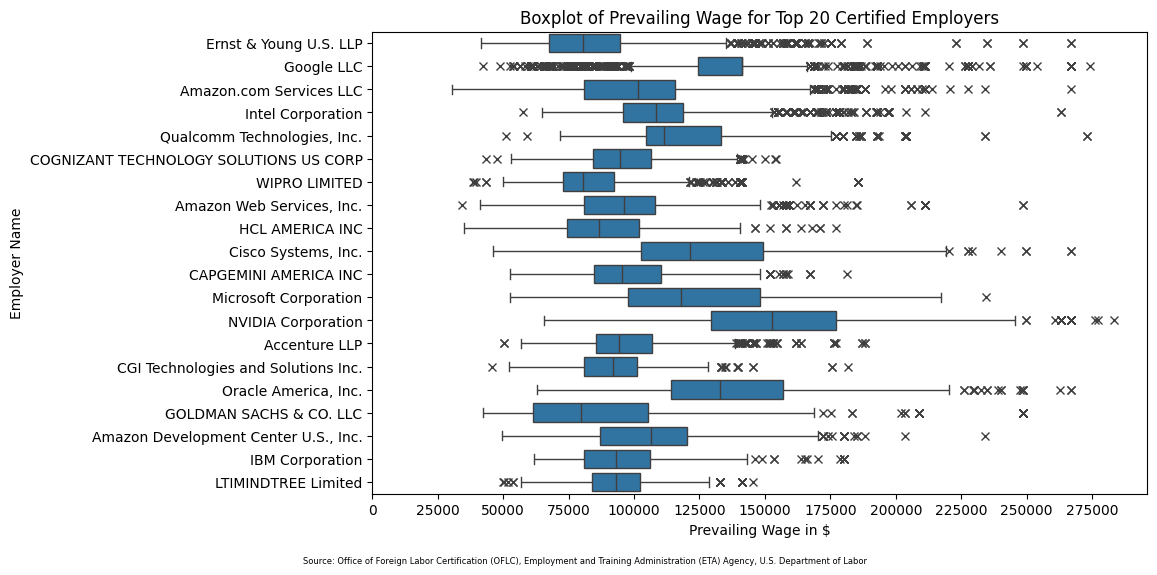

In [47]:
# Let's create a boxplot that shows the distribution of the prevailing wages for each of the top 30 employers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='PREVAILING_WAGE', y='EMPLOYER_NAME', 
            data=certified_h1b_year, order=certified_h1b_year['EMPLOYER_NAME'].value_counts()[0:20].index, 
            ax=ax,
            flierprops={"marker": "x"});
ax.set_title('Boxplot of Prevailing Wage for Top 20 Certified Employers');
ax.set_xlabel('Prevailing Wage in $');
ax.set_xticks(np.arange(0, 300000, 25000));
ax.set_ylabel('Employer Name');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-50,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


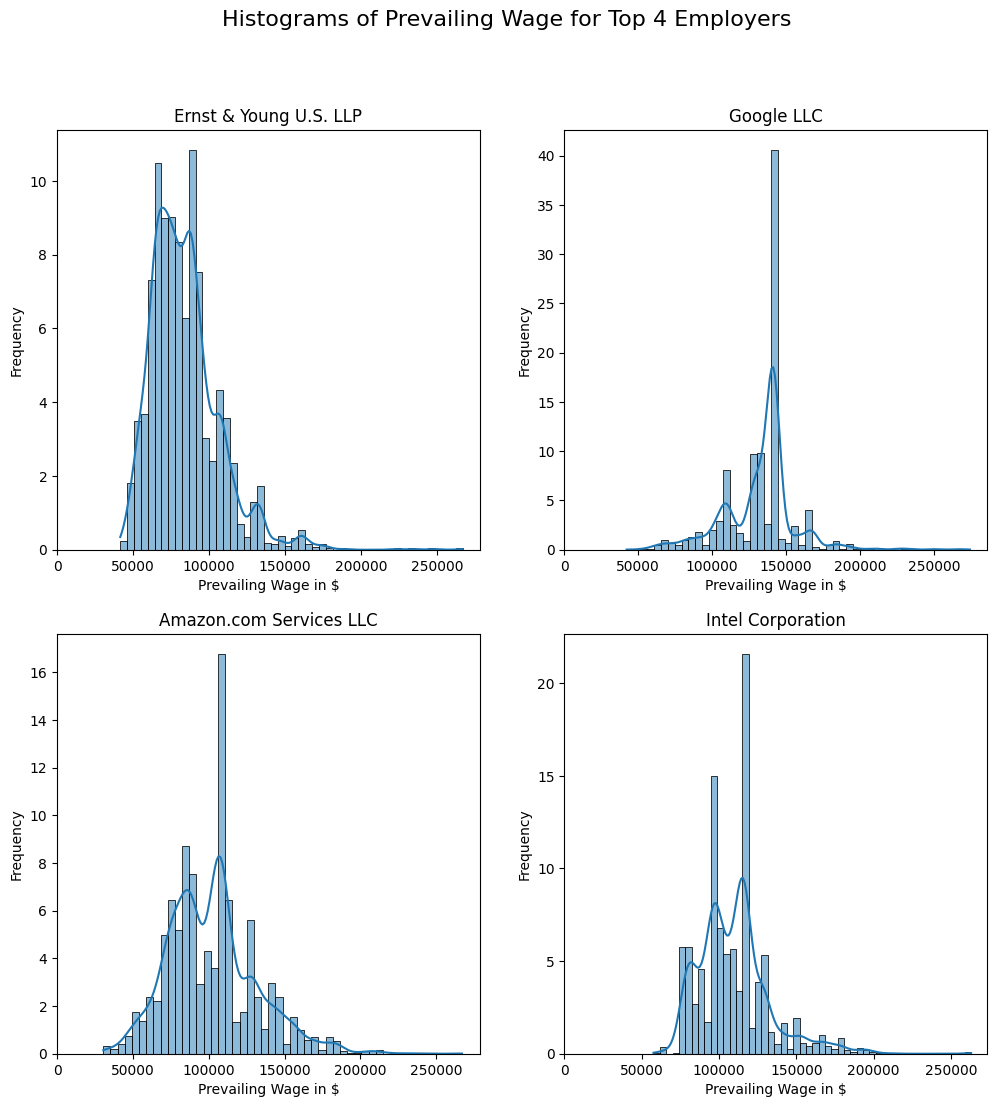

In [48]:
# Let's plot 4 histograms of the prevailing wage for the top 4 employers
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Histograms of Prevailing Wage for Top 4 Employers', fontsize=16)
for i in range(4):
    sns.histplot(certified_h1b_year[certified_h1b_year['EMPLOYER_NAME'] == certified_h1b_year['EMPLOYER_NAME'].value_counts().index[i]]['PREVAILING_WAGE'], 
                 bins=50, stat='percent', kde=True, ax=ax[i//2, i%2]);
    ax[i//2, i%2].set_title(f'{certified_h1b_year["EMPLOYER_NAME"].value_counts().index[i]}');
    ax[i//2, i%2].set_xlabel('Prevailing Wage in $');
    ax[i//2, i%2].set_ylabel('Frequency');
    ax[i//2, i%2].set_xticks(np.arange(0, 300000, 50000));

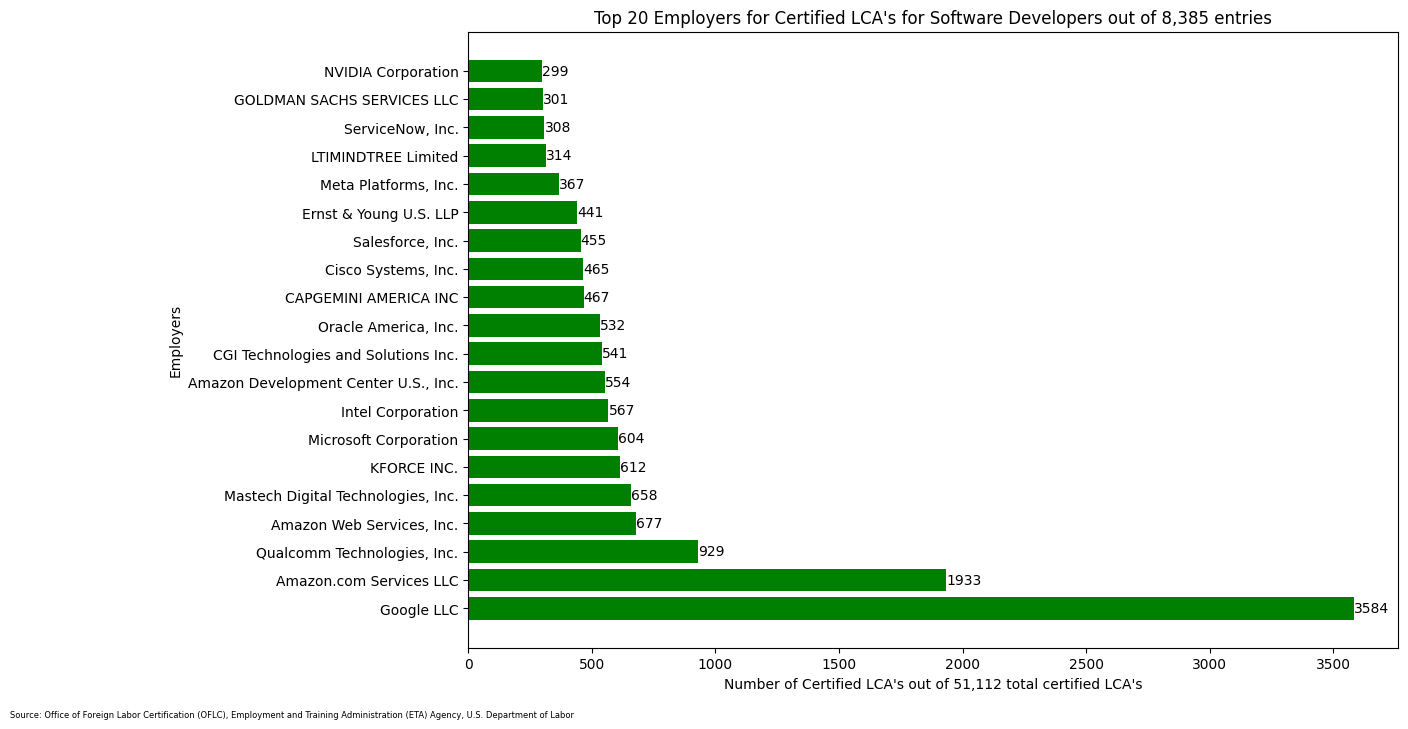

In [49]:
# Let's plot a bar graph that displays the top 20 employers for the SOC title "Software Developers"
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Software Developers']['EMPLOYER_NAME'].value_counts()[0:20].index, 
        certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Software Developers']['EMPLOYER_NAME'].value_counts()[0:20].values, color='green');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 Employers for Certified LCA\'s for Software Developers out of {certified_h1b_renewed[certified_h1b_renewed["SOC_TITLE"] == "Software Developers"]["EMPLOYER_NAME"].nunique():,} entries');
ax.set_ylabel('Employers');
ax.set_xlabel(f'Number of Certified LCA\'s out of {certified_h1b_renewed[certified_h1b_renewed["SOC_TITLE"] == "Software Developers"].shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

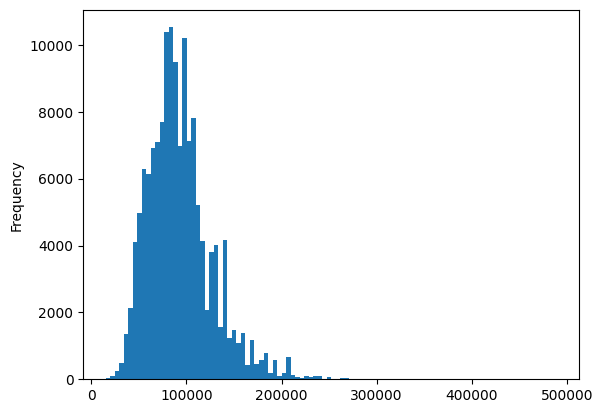

In [50]:
# let's see what the different PREVAILING_WAGE values are for the certified_h1b_year data frame
certified_h1b_year['PREVAILING_WAGE'].plot(kind='hist', bins=100);

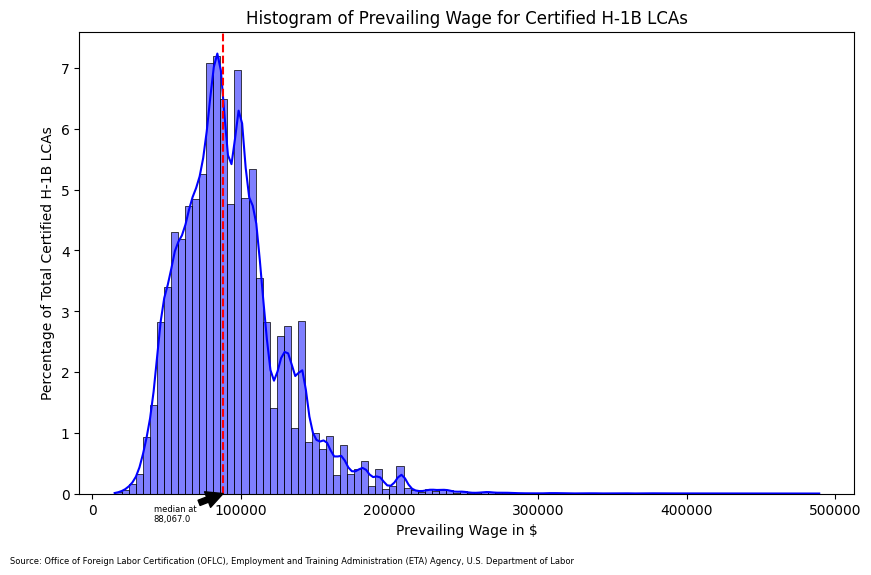

In [51]:
# Let's use the seaborn library to create a histogram of the PREVAILING_WAGE values
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(certified_h1b_year, x='PREVAILING_WAGE', stat='percent', bins=100, color='blue', ax=ax, kde=True);
ax.set_title('Histogram of Prevailing Wage for Certified H-1B LCAs');
ax.set_xlabel('Prevailing Wage in $');
ax.set_ylabel('Percentage of Total Certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-50,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text=f'median at\n{certified_h1b_year['PREVAILING_WAGE'].median():,}', xy=(certified_h1b_year['PREVAILING_WAGE'].median(), 0), xytext=(-50,-20), arrowprops=dict(color='black'), fontsize=6, 
             xycoords='data', textcoords='offset points');
plt.axvline(x=certified_h1b_year['PREVAILING_WAGE'].median(), color='red', linestyle='--');


In [52]:
# let's see what the different PREVAILING_WAGE values are for the certified_h1b_year data frame
certified_h1b_year['PREVAILING_WAGE'].describe()

count    146315.000000
mean      93723.941344
std       35152.320538
min       15080.000000
25%       69867.000000
50%       88067.000000
75%      109543.500000
max      489250.000000
Name: PREVAILING_WAGE, dtype: float64

In [53]:
# using the NAICS code, let's find out which employers were colleges and universities
colleges_and_universities = certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]
colleges_and_universities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14340 entries, 203 to 633807
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     14340 non-null  object        
 1   CASE_STATUS                     14340 non-null  object        
 2   RECEIVED_DATE                   14340 non-null  datetime64[ns]
 3   DECISION_DATE                   14340 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      14340 non-null  object        
 6   JOB_TITLE                       14340 non-null  object        
 7   SOC_CODE                        14340 non-null  object        
 8   SOC_TITLE                       14340 non-null  object        
 9   FULL_TIME_POSITION              14340 non-null  object        
 10  BEGIN_DATE                      14340 non-null  datetime64[ns]
 11  END_

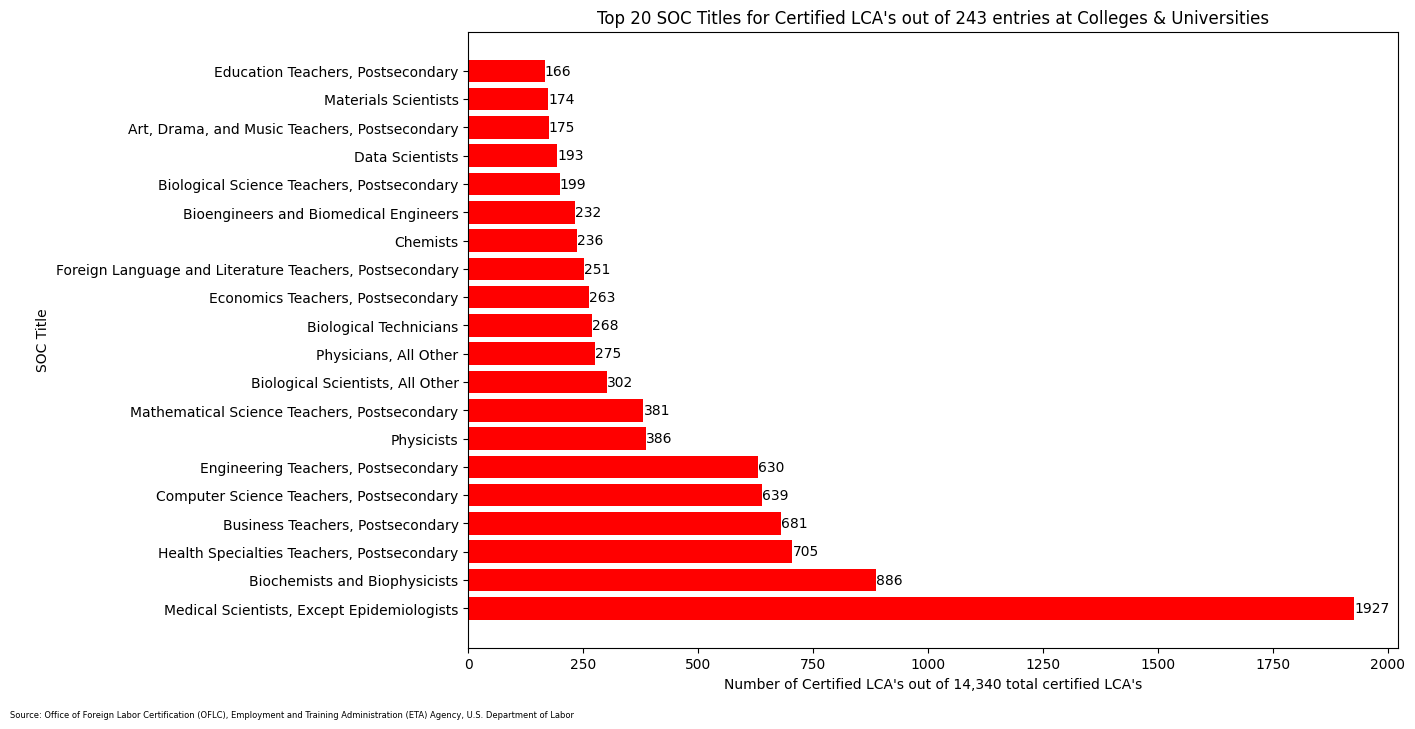

In [54]:
# let's plot a bar graph of the different SOC titles that appear in the dataset for certified H-1B LCA's for all employers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(colleges_and_universities['SOC_TITLE'].value_counts()[0:20].index, colleges_and_universities['SOC_TITLE'].value_counts()[0:20].values, color='red');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 SOC Titles for Certified LCA\'s out of {colleges_and_universities['SOC_TITLE'].nunique():,} entries at Colleges & Universities');
ax.set_ylabel('SOC Title');
ax.set_xlabel(f'Number of Certified LCA\'s out of {colleges_and_universities.shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


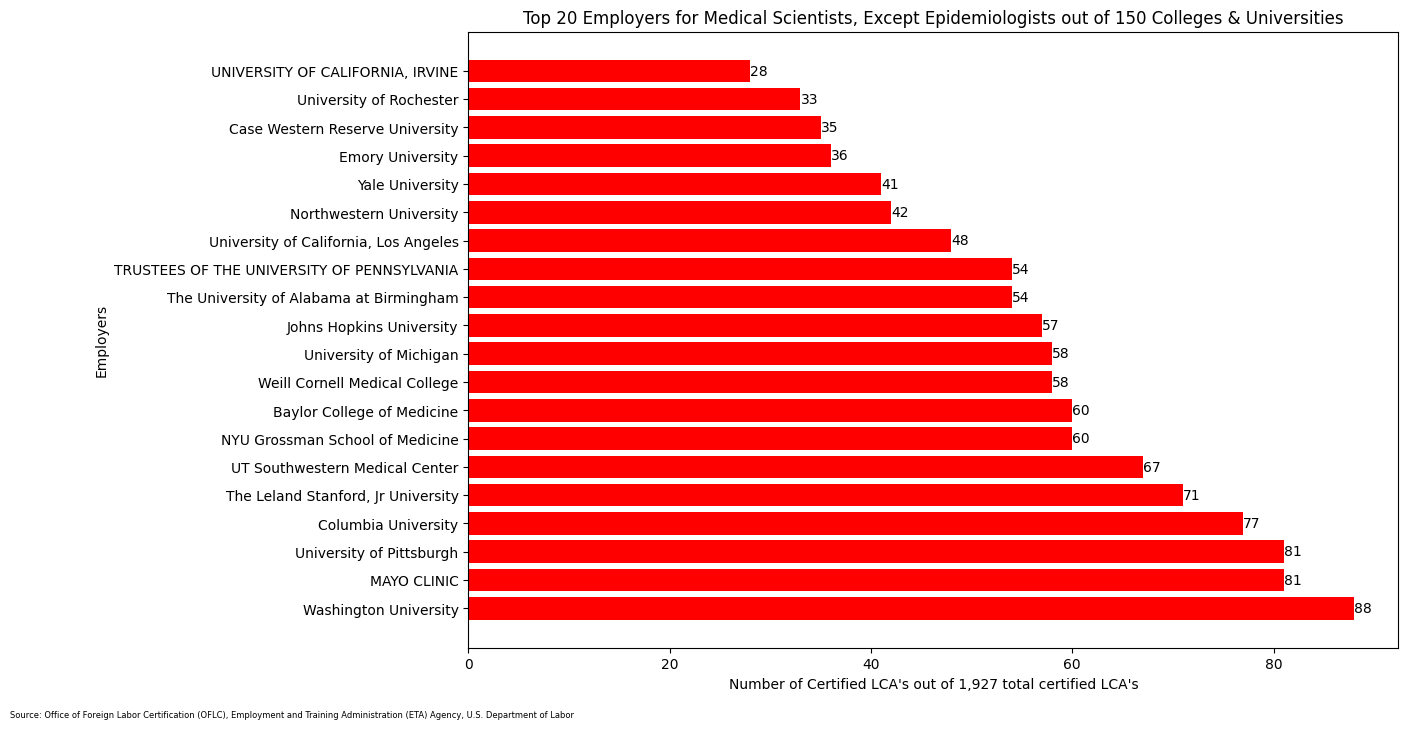

In [55]:
# let's plot a bar graph of the different SOC titles that appear in the dataset for certified H-1B LCA's for all employers at colleges and universities
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists']['EMPLOYER_NAME'].value_counts()[0:20].index,
        colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists']['EMPLOYER_NAME'].value_counts()[0:20].values, 
        color='red');
ax.bar_label(ax.containers[0]);
ax.set_title(f'Top 20 Employers for Medical Scientists, Except Epidemiologists out of {colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists']['EMPLOYER_NAME'].nunique():,} Colleges & Universities');
ax.set_ylabel('Employers');
ax.set_xlabel(f'Number of Certified LCA\'s out of {colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists'].shape[0]:,} total certified LCA\'s');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


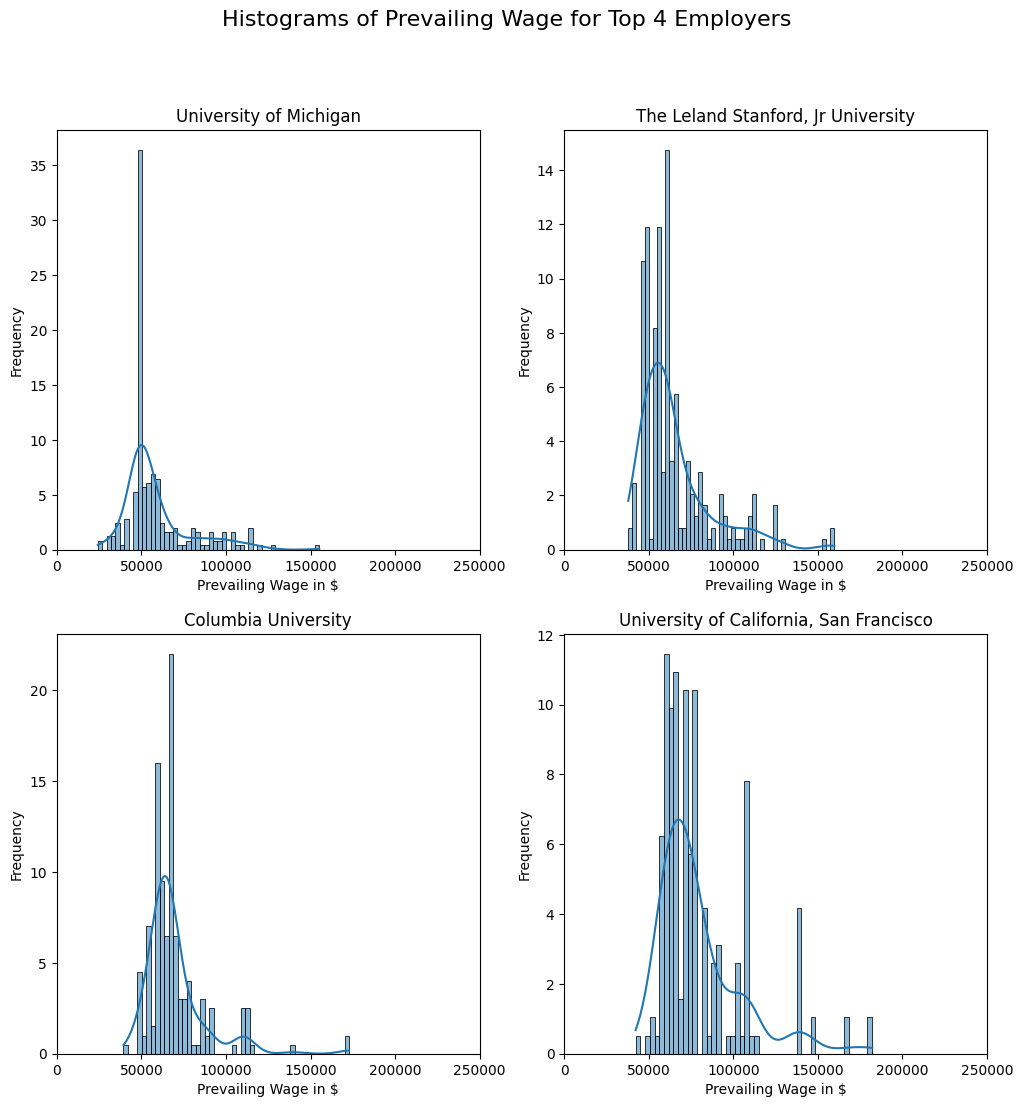

In [56]:
# Let's plot 4 histograms of the prevailing wage for the top 4 employers at colleges and universities
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Histograms of Prevailing Wage for Top 4 Employers', fontsize=16)
for i in range(4):
    sns.histplot(colleges_and_universities[colleges_and_universities['EMPLOYER_NAME'] == colleges_and_universities['EMPLOYER_NAME'].value_counts().index[i]]['PREVAILING_WAGE'], 
                 bins=50, stat='percent', kde=True, ax=ax[i//2, i%2]);
    ax[i//2, i%2].set_title(f'{colleges_and_universities["EMPLOYER_NAME"].value_counts().index[i]}');
    ax[i//2, i%2].set_xlabel('Prevailing Wage in $');
    ax[i//2, i%2].set_ylabel('Frequency');
    ax[i//2, i%2].set_xticks(np.arange(0, 300000, 50000));

In [57]:
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Software Developers'].shape

(62, 96)

In [58]:
certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists'].shape

(3145, 96)

In [59]:
certified_h1b_renewed[certified_h1b_renewed['SOC_TITLE'] == 'Software Developers'].shape

(51112, 96)

In [60]:
# let's dig deeper into the Mathematical Science Teachers, Postsecondary entries
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Mathematical Science Teachers, Postsecondary'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 3019 to 631455
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     381 non-null    object        
 1   CASE_STATUS                     381 non-null    object        
 2   RECEIVED_DATE                   381 non-null    datetime64[ns]
 3   DECISION_DATE                   381 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      381 non-null    object        
 6   JOB_TITLE                       381 non-null    object        
 7   SOC_CODE                        381 non-null    object        
 8   SOC_TITLE                       381 non-null    object        
 9   FULL_TIME_POSITION              381 non-null    object        
 10  BEGIN_DATE                      381 non-null    datetime64[ns]
 11  END_D

In [61]:
# let's dig deeper into the Mathematical Science Teachers, Postsecondary entries
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Mathematical Science Teachers, Postsecondary']['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
MICHIGAN STATE UNIVERSITY                     11
The Ohio State University                      9
University of Notre Dame du Lac                7
University of Michigan                         6
Louisiana State University and A&M College     6
                                              ..
Millsaps College                               1
Carolina University                            1
THE TRUSTEES OF PRINCETON UNIVERSITY           1
STATE UNIVERSITY OF NEW YORK AT BUFFALO        1
The College of William and Mary                1
Name: count, Length: 197, dtype: int64

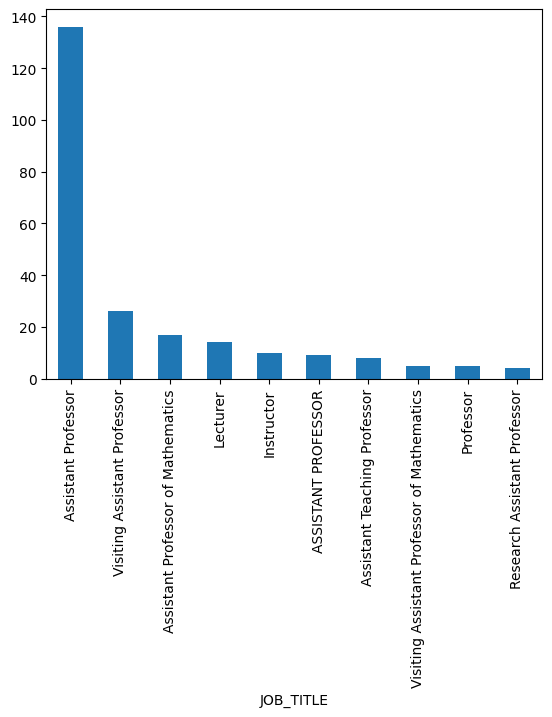

In [62]:
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Mathematical Science Teachers, Postsecondary']['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

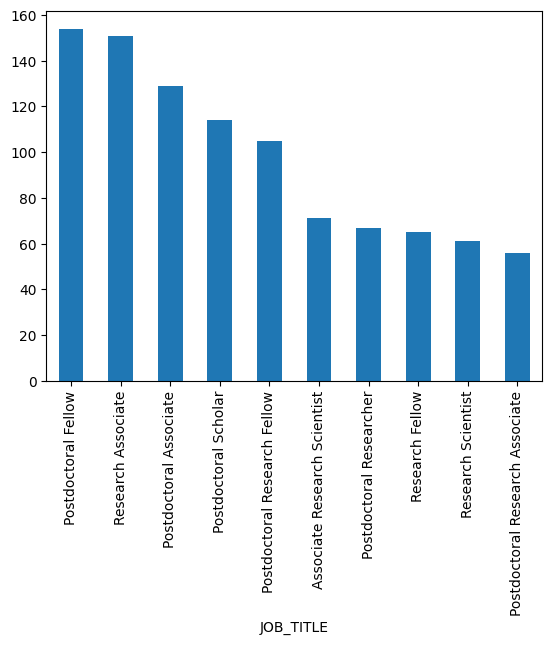

In [63]:
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists']['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

In [64]:
colleges_and_universities[colleges_and_universities['SOC_TITLE'] == 'Medical Scientists, Except Epidemiologists']['JOB_TITLE'].value_counts()[0:10]

JOB_TITLE
Postdoctoral Fellow                154
Research Associate                 151
Postdoctoral Associate             129
Postdoctoral Scholar               114
Postdoctoral Research Fellow       105
Associate Research Scientist        71
Postdoctoral Researcher             67
Research Fellow                     65
Research Scientist                  61
Postdoctoral Research Associate     56
Name: count, dtype: int64

In [65]:
occupations = ['Business Teachers', 'Foreign Language and Literature Teachers, Postsecondary', 'Art, Drama, And Music Teachers, Postsecondary', 'Economics Teachers, Postsecondary']
non_stem_colleges = colleges_and_universities[colleges_and_universities['SOC_TITLE'].isin(occupations)]
non_stem_colleges['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
Harvard University           14
Columbia University          13
University of Illinois        9
The Ohio State University     8
University of Montana         8
                             ..
St. Francis College           1
Allegheny College             1
RANDOLPH-MACON COLLEGE        1
Dominican University          1
Vassar College                1
Name: count, Length: 226, dtype: int64

In [66]:
colleges_and_universities[(colleges_and_universities['EMPLOYER_NAME'] == non_stem_colleges['EMPLOYER_NAME'].value_counts().index[0]) & (colleges_and_universities['SOC_TITLE'].isin(occupations))]

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
119421,I-200-23181-160938,Certified,2023-06-30,2023-07-10,NaT,H-1B,Lecturer,25-1063.00,"Economics Teachers, Postsecondary",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
158639,I-200-23160-094683,Certified,2023-06-09,2023-06-16,NaT,H-1B,Research Fellow,25-1063.00,"Economics Teachers, Postsecondary",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
289338,I-200-23097-914580,Certified,2023-04-07,2023-04-14,NaT,H-1B,Assistant Professor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
320899,I-200-23081-868881,Certified,2023-03-22,2023-03-29,NaT,H-1B,Preceptor in Russian Language,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
375295,I-200-23052-790505,Certified,2023-02-21,2023-02-28,NaT,H-1B,Preceptor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
375442,I-200-23052-790523,Certified,2023-02-21,2023-02-28,NaT,H-1B,Preceptor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
381360,I-200-23047-779521,Certified,2023-02-16,2023-02-23,NaT,H-1B,Preceptor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
383561,I-200-23046-776104,Certified,2023-02-15,2023-02-22,NaT,H-1B,Preceptor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
402900,I-200-23033-746635,Certified,2023-02-02,2023-02-09,NaT,H-1B,Preceptor,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
428556,I-200-23013-701897,Certified,2023-01-13,2023-01-20,NaT,H-1B,Preceptor in Modern Turkish,25-1124.00,"Foreign Language and Literature Teachers, Post...",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [67]:
certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]['EMPLOYER_NAME'].unique()

array(['University of Kentucky',
       'Administrators of the Tulane Educational Fund',
       'University of Georgia; OGE', ..., 'UNIVERSITY OF WEST ALABAMA',
       'Erikson Institute', 'Hillsdale College'], dtype=object)

In [68]:
dir(colleges_and_universities['EMPLOYER_NAME'].unique())

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [69]:
colleges_and_universities['EMPLOYER_NAME'].unique().__len__()

1044

In [70]:
colleges_and_universities['EMPLOYER_NAME'].unique().size

1044

In [71]:
colleges_and_universities['JOB_TITLE'].value_counts()

JOB_TITLE
Assistant Professor                                     2511
Postdoctoral Fellow                                      483
Research Associate                                       429
Postdoctoral Scholar                                     401
Postdoctoral Research Associate                          362
                                                        ... 
Cytogenetics Technologist 2                                1
Assistant Professor (Mathematical and Data Sciences)       1
Technical and Internship Engagement Specialist             1
ASSOCIATE PROFESSOR OF PHILOSOPHY                          1
Research Engineering/Research Associate III                1
Name: count, Length: 3254, dtype: int64

In [72]:
colleges_and_universities['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
University of Michigan                            247
The Leland Stanford, Jr University                244
Columbia University                               200
University of California, San Francisco           192
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA        177
                                                 ... 
Oregon Health and Science University                1
New York Medical College                            1
Sofia University                                    1
Paul Quinn College                                  1
Minerva Institute for Research and Scholarship      1
Name: count, Length: 1044, dtype: int64

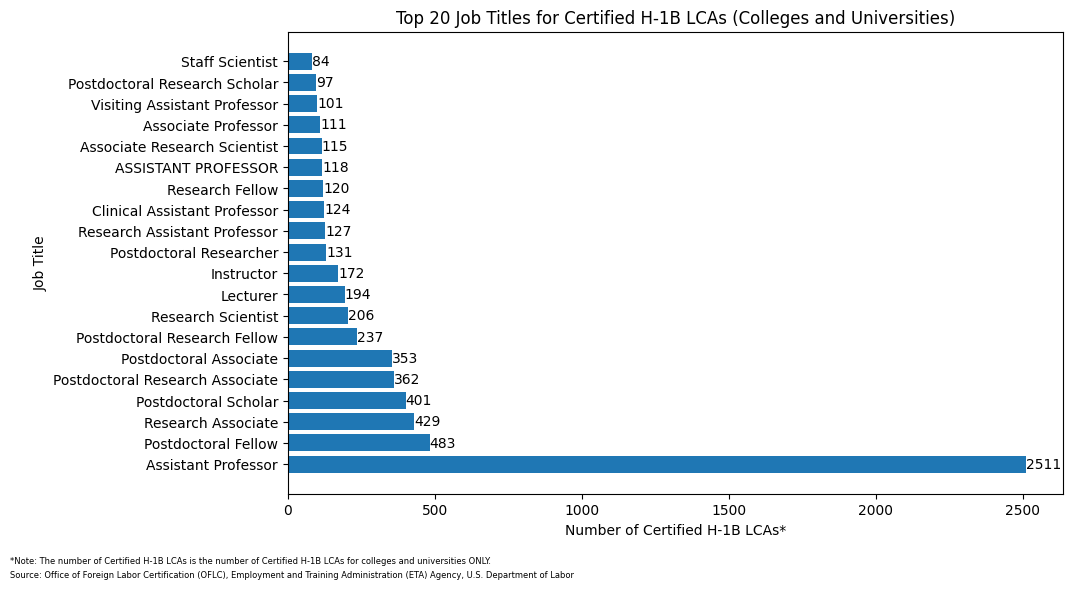

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['JOB_TITLE'].value_counts()[0:20].index, colleges_and_universities['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs (Colleges and Universities)');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: The number of Certified H-1B LCAs is the number of Certified H-1B LCAs for colleges and universities ONLY.', xy=(0,0), xytext=(-200,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-200,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

In [74]:
# let's see what the different job titles were for each given employer in the colleges_and_universities data frame
colleges_and_universities.groupby('EMPLOYER_NAME')['JOB_TITLE'].value_counts().sort_values(ascending=False)

EMPLOYER_NAME                            JOB_TITLE                                                
University of Michigan                   Postdoctoral Research Fellow                                 121
University of California, San Francisco  Postdoctoral Scholar                                          87
The Leland Stanford, Jr University       Postdoctoral Research Affiliate                               81
MAYO CLINIC                              Research Fellow                                               59
Columbia University                      Associate Research Scientist                                  53
                                                                                                     ... 
SOUTHERN METHODIST UNIVERSITY            Professor – Edmund J. and Louise W. Kahn Chair in History      1
                                         Senior Teaching Laboratory Manager                             1
                                         Statistician

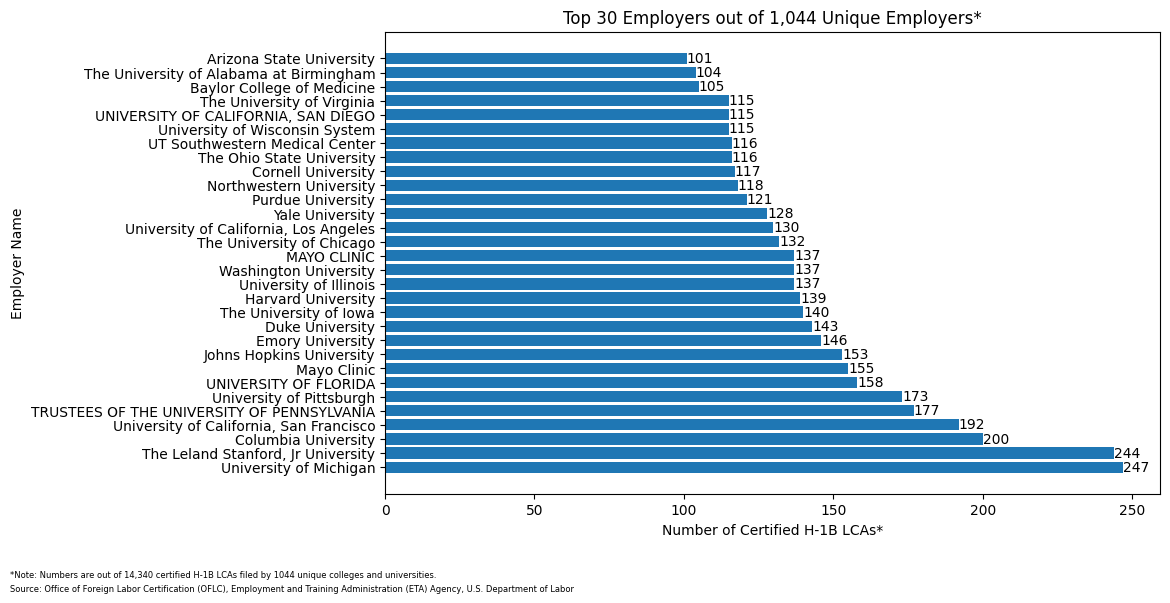

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:30].index, colleges_and_universities['EMPLOYER_NAME'].value_counts()[0:30].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text(f'Top 30 Employers out of {colleges_and_universities['EMPLOYER_NAME'].nunique():,} Unique Employers*');
ax.set_ylabel('Employer Name');
ax.set_xlabel(f'Number of Certified H-1B LCAs*');
ax.annotate(text=f'*Note: Numbers are out of {colleges_and_universities.shape[0]:,} certified H-1B LCAs filed by {colleges_and_universities['EMPLOYER_NAME'].unique().size} unique colleges and universities.', xy=(0,0), xytext=(-270,-60), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-270,-70), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


In [76]:
type(colleges_and_universities['EMPLOYER_NAME'].unique())

numpy.ndarray

In [77]:
# let's print out a table of the unique employer names
ls = [print(x) for x in colleges_and_universities['EMPLOYER_NAME'].unique()]

University of Kentucky
Administrators of the Tulane Educational Fund
University of Georgia; OGE
Lamar University
Harvard University
Cleveland State University
Cornell University
Louisiana State University and A&M College
Bard College
University of Pittsburgh
The University of Virginia
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA
Temple University--A Commonwealth University
University of Texas at Arlington
The University of Texas Health Science Center at Houston
WICHITA STATE UNIVERSITY
ALBANY MEDICAL COLLEGE
SOUTHERN METHODIST UNIVERSITY
Yale University
University of Minnesota
Gettysburg College
New York University
East Carolina University
University of Massachusetts Boston
The Trustees of Princeton University
University of California, Berkeley
Oregon State University
The University of Chicago
The Pennsylvania State University
Colorado Seminary
Emory University
Menlo College
Oklahoma State University
Mayo Clinic
The University of Iowa
West Virginia University
The University of Texas at A

In [78]:
colleges_and_universities['JOB_TITLE'].value_counts()[0:20].index

Index(['Assistant Professor', 'Postdoctoral Fellow', 'Research Associate',
       'Postdoctoral Scholar', 'Postdoctoral Research Associate',
       'Postdoctoral Associate', 'Postdoctoral Research Fellow',
       'Research Scientist', 'Lecturer', 'Instructor',
       'Postdoctoral Researcher', 'Research Assistant Professor',
       'Clinical Assistant Professor', 'Research Fellow',
       'ASSISTANT PROFESSOR', 'Associate Research Scientist',
       'Associate Professor', 'Visiting Assistant Professor',
       'Postdoctoral Research Scholar', 'Staff Scientist'],
      dtype='object', name='JOB_TITLE')

In [79]:
# let's find colleges and universities in Pennsylvania
colleges_and_universities['WORKSITE_STATE'].value_counts()

WORKSITE_STATE
CA    1516
NY    1285
TX    1207
PA     699
IL     641
      ... 
WY      18
PR      15
VI       3
GU       2
AK       1
Name: count, Length: 54, dtype: int64

In [80]:
colleges_and_universities_pa = colleges_and_universities[colleges_and_universities['WORKSITE_STATE'] == 'PA']
colleges_and_universities_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 833 to 632851
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     699 non-null    object        
 1   CASE_STATUS                     699 non-null    object        
 2   RECEIVED_DATE                   699 non-null    datetime64[ns]
 3   DECISION_DATE                   699 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      699 non-null    object        
 6   JOB_TITLE                       699 non-null    object        
 7   SOC_CODE                        699 non-null    object        
 8   SOC_TITLE                       699 non-null    object        
 9   FULL_TIME_POSITION              699 non-null    object        
 10  BEGIN_DATE                      699 non-null    datetime64[ns]
 11  END_DA

In [81]:
colleges_and_universities_pa['EMPLOYER_NAME'].nunique()

47

In [82]:
colleges_and_universities_pa['EMPLOYER_NAME'].unique()

array(['University of Pittsburgh',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'Gettysburg College', 'The Pennsylvania State University',
       'Carnegie Mellon University', 'Lehigh University',
       'Drexel University', 'Thomas Jefferson University',
       'Wright Center for Graduate Medical Education',
       'Mercyhurst University', 'Duquesne University',
       'Alvernia University', 'Widener University', 'Gannon University',
       'Eastern University', 'Bucknell University', 'URSINUS COLLEGE',
       'Moravian University', 'Haverford College', 'Villanova University',
       'DeSales University', 'Slippery Rock University of Pennsylvania',
       'COMMONWEALTH UNIVERSITY OF PENNSYLVANIA', 'Allegheny College',
       'Muhlenberg College', 'Temple University Hospital, Inc',
       'Arcadia University', 'Trustees of the University of Pennsylvania',
       'University of Rochester', 'Chestnut Hill College',
   

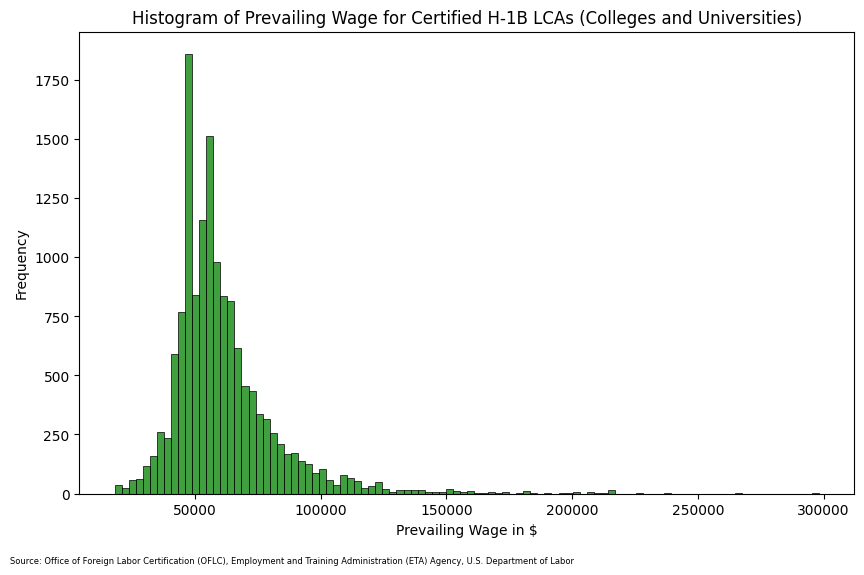

In [83]:
# let's use the Seaborn package to create a histogram of the PREVAILING_WAGE values for jobs at colleges and universities in Pennsylvania
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(colleges_and_universities, x='PREVAILING_WAGE', stat='count', bins=100, color='green', ax=ax);
ax.set_title('Histogram of Prevailing Wage for Certified H-1B LCAs (Colleges and Universities)');
ax.set_xlabel('Prevailing Wage in $');
ax.set_ylabel('Frequency');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-50,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


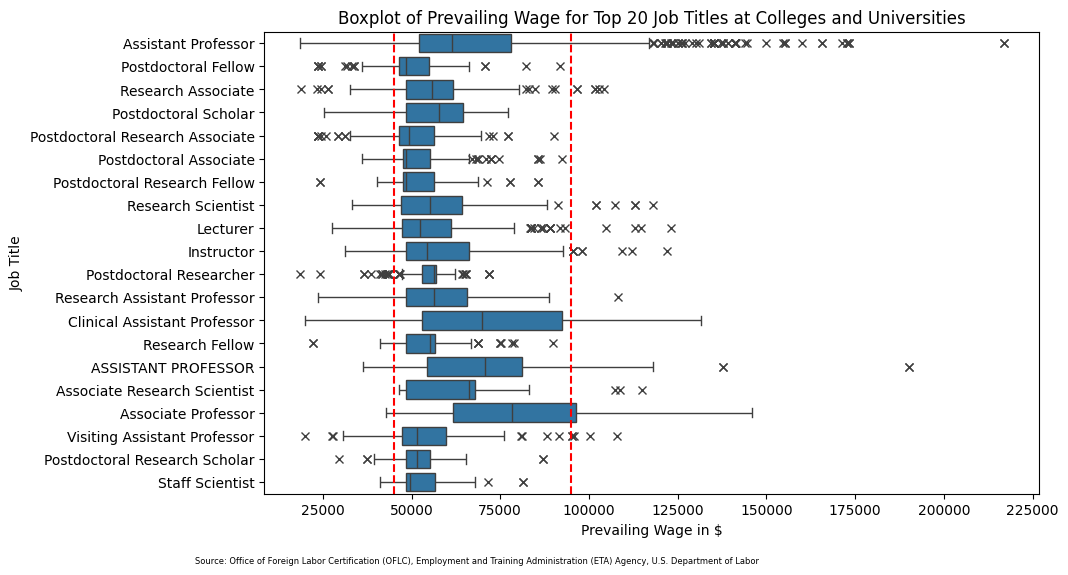

In [84]:
# Let's use the Seaborn package to create a boxplot of the PREVAILING_WAGE values for the top 20 jobs at colleges and universities
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='PREVAILING_WAGE', y='JOB_TITLE', 
            data=colleges_and_universities, order=colleges_and_universities['JOB_TITLE'].value_counts()[0:20].index, 
            ax=ax,
            flierprops={"marker": "x"});
ax.set_title('Boxplot of Prevailing Wage for Top 20 Job Titles at Colleges and Universities');
ax.set_xlabel('Prevailing Wage in $');
ax.set_ylabel('Job Title');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-50,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');

plt.axvline(x=45000, color='red', linestyle='--');
plt.axvline(x=95000, color='red', linestyle='--');

Using the Reuters article linked [here](https://www.reuters.com/markets/us/us-job-growth-slows-april-unemployment-rate-rises-39-2024-05-03/), let's find out about the companies that are classified as being in the healthcare sector using the NAICS classification system.

In [85]:
# let's find out which companies are in the healthcare sector using the NAICS codes
healthcare = certified_h1b_year.copy()
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146315 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     146315 non-null  object        
 1   CASE_STATUS                     146315 non-null  object        
 2   RECEIVED_DATE                   146315 non-null  datetime64[ns]
 3   DECISION_DATE                   146315 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      146315 non-null  object        
 6   JOB_TITLE                       146315 non-null  object        
 7   SOC_CODE                        146315 non-null  object        
 8   SOC_TITLE                       146315 non-null  object        
 9   FULL_TIME_POSITION              146315 non-null  object        
 10  BEGIN_DATE                      146315 non-null  datetime64

In [86]:
# convert column to string to make searching easier
healthcare['NAICS_CODE'] = [str(x) for x in healthcare['NAICS_CODE']]
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146315 entries, 185 to 633892
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     146315 non-null  object        
 1   CASE_STATUS                     146315 non-null  object        
 2   RECEIVED_DATE                   146315 non-null  datetime64[ns]
 3   DECISION_DATE                   146315 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null       datetime64[ns]
 5   VISA_CLASS                      146315 non-null  object        
 6   JOB_TITLE                       146315 non-null  object        
 7   SOC_CODE                        146315 non-null  object        
 8   SOC_TITLE                       146315 non-null  object        
 9   FULL_TIME_POSITION              146315 non-null  object        
 10  BEGIN_DATE                      146315 non-null  datetime64

In [87]:
type(healthcare['NAICS_CODE'].values[0])

str

In [88]:
# 62 is sector 62 according to the NAICS
healthcare_companies = healthcare[healthcare['NAICS_CODE'].str.startswith('62')]
healthcare_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6891 entries, 185 to 633858
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     6891 non-null   object        
 1   CASE_STATUS                     6891 non-null   object        
 2   RECEIVED_DATE                   6891 non-null   datetime64[ns]
 3   DECISION_DATE                   6891 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      6891 non-null   object        
 6   JOB_TITLE                       6891 non-null   object        
 7   SOC_CODE                        6891 non-null   object        
 8   SOC_TITLE                       6891 non-null   object        
 9   FULL_TIME_POSITION              6891 non-null   object        
 10  BEGIN_DATE                      6891 non-null   datetime64[ns]
 11  END_D

In [89]:
healthcare_companies['NAICS_CODE'].unique()

array(['622110', '621610', '621498', '621340', '62199', '62211', '621111',
       '622310', '62111', '621210', '6216', '62134', '624410', '621330',
       '62121', '621399', '6221', '62151', '6211', '62161', '62411',
       '6232', '624110', '622210', '621410', '62142', '621511', '621999',
       '621112', '621320', '623990', '6213', '624190', '62149', '6223',
       '621991', '62133', '621491', '623110', '62399', '621420', '623220',
       '624229', '6241', '62419', '621492', '6214', '624120', '623312',
       '621512', '62231', '62131', '6219', '621493', '624230', '62139',
       '624210', '6243', '6212', '621391', '6215', '62412', '623311',
       '621310', '6242', '624310', '62141', '62422', '62132'],
      dtype=object)

In [90]:
# let's see what companies are in the healthcare sector in PA
healthcare_companies_pa = healthcare_companies[healthcare_companies['WORKSITE_STATE'] == 'PA']
healthcare_companies_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 1011 to 628518
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     459 non-null    object        
 1   CASE_STATUS                     459 non-null    object        
 2   RECEIVED_DATE                   459 non-null    datetime64[ns]
 3   DECISION_DATE                   459 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      459 non-null    object        
 6   JOB_TITLE                       459 non-null    object        
 7   SOC_CODE                        459 non-null    object        
 8   SOC_TITLE                       459 non-null    object        
 9   FULL_TIME_POSITION              459 non-null    object        
 10  BEGIN_DATE                      459 non-null    datetime64[ns]
 11  END_D

In [91]:
healthcare_companies_pa['EMPLOYER_NAME'].unique()

array(['Centerville Clinics, Inc.', 'Pinnacle Health Medical Services',
       'Department of Veterans Affairs',
       'University of Pittsburgh Physicians',
       'Revolutionary Home Health, Inc.', "DRISCOLL CHILDREN'S HOSPITAL",
       'Aviva Mental Health Services, Inc.',
       'UPMC Presbyterian Shadyside',
       "The Children's Hospital of Philadelphia",
       'North Penn Comprehensive Health Services', 'MedAmerica, Inc.',
       'Blue Bell Dental Associates PC', 'WellSpan Medical Group',
       'DLP Conemaugh Physician Services LLC', 'UPMC Passavant',
       'Women Against Abuse, Inc.', 'UPMC Pinnacle Hospitals',
       'Smile Team PC', 'Thomas Jefferson University Hospital',
       'Best Behavioral Healthcare, Inc.',
       'DLP Conemaugh Physician Practices, LLC', 'Dental Dreams LLC',
       "UPMC Children's Hospital of Pittsburgh",
       'OMNI Health Services, Inc.', 'Guthrie Medical Group P.C.',
       'Geisinger Clinic', 'Associates in Nephrology PC',
       'St. Mary 

In [92]:
healthcare_companies_pa['JOB_TITLE'].unique()

array(['Family Medicine Physician', 'Pain Management',
       'Cardiologist (Electrophysiologist)',
       'Assistant Professor- Cardiology', 'Registered Nurse Case Manager',
       'Pediatric Resident - Elective Rotation', 'HR Manager',
       'Software Engineer - Tech Lead', 'Postdoctoral Fellow',
       'Research Associate', 'Data Scientist (Remote)',
       'Medical & Healthcare Manager', 'Medical Lab Scientist',
       'Physician, Family Medicine', 'Internal Medicine Physician',
       'Clinical Nurse Manager', 'Clinical Scientist',
       'Director of Evaluation and Learning', 'Clinical Fellow',
       'Medical Physicist', 'General Dentist', 'Fellow',
       'Mental Health Professional', 'Physicians Assistant, Specialist',
       'Noninvasive Cardiologist', 'Dentist',
       'Pulmonary/Critical Care Physician', 'Psychology Fellow Associate',
       'Behavioral Health Counselor', 'Hospitalist',
       'Outpatient Therapist', 'Physician, Hospitalist', 'Nephrologist',
       'Intern

In [93]:
healthcare_companies_pa['JOB_TITLE'].value_counts()

JOB_TITLE
Direct Care Professional                55
Resident - Internal Medicine            21
Medical Resident (Internal Medicine)    17
Resident - Family Medicine              10
Outpatient Therapist                     8
                                        ..
Medical Resident (Anesthesiology)        1
Clinical Scientist                       1
Pediatric Anesthesiologist               1
Director of Evaluation and Learning      1
ADDORE Outreach Manager                  1
Name: count, Length: 195, dtype: int64

In [94]:
healthcare_companies_pa.reset_index(drop=True, inplace=True)
healthcare_companies_pa

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23265-371069,Certified,2023-09-22,2023-09-29,NaT,H-1B,Family Medicine Physician,29-1215.00,Family Medicine Physicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-23265-373139,Certified,2023-09-22,2023-09-29,NaT,H-1B,Pain Management,29-1229.00,"Physicians, All Other",Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
2,I-200-23264-366438,Certified,2023-09-21,2023-09-28,NaT,H-1B,Cardiologist (Electrophysiologist),29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business and Employment,NaN,NaN,NaN,NaN,NaN
3,I-200-23263-362681,Certified,2023-09-20,2023-09-27,NaT,H-1B,Assistant Professor- Cardiology,29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
4,I-200-23262-360315,Certified,2023-09-19,2023-09-26,NaT,H-1B,Registered Nurse Case Manager,29-1141.00,Registered Nurses,Y,...,No,NaN,NaN,NaN,Disclose Business,Buccceroni,Mandi,B,Reger Rizzo Darnall LLP,mbucceroni@regerlaw.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,I-200-22279-514411,Certified,2022-10-06,2022-10-14,NaT,H-1B,Senior Medical Physicist,29-1299.00,Healthcare Diagnosing or Treating Practitioner...,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
455,I-200-22279-514416,Certified,2022-10-06,2022-10-14,NaT,H-1B,Senior Medical Physicist,29-1299.00,Healthcare Diagnosing or Treating Practitioner...,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
456,I-200-22279-514410,Certified,2022-10-06,2022-10-14,NaT,H-1B,Senior Medical Physicist,19-2012.00,Physicists,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
457,I-200-22279-514406,Certified,2022-10-06,2022-10-14,NaT,H-1B,Senior Medical Physicist,19-2012.00,Physicists,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


### TODO: Use [this function](https://docs.python.org/3/library/string.html#string.capwords) to combine duplicate values in the JOB_TITLE field of the dataset

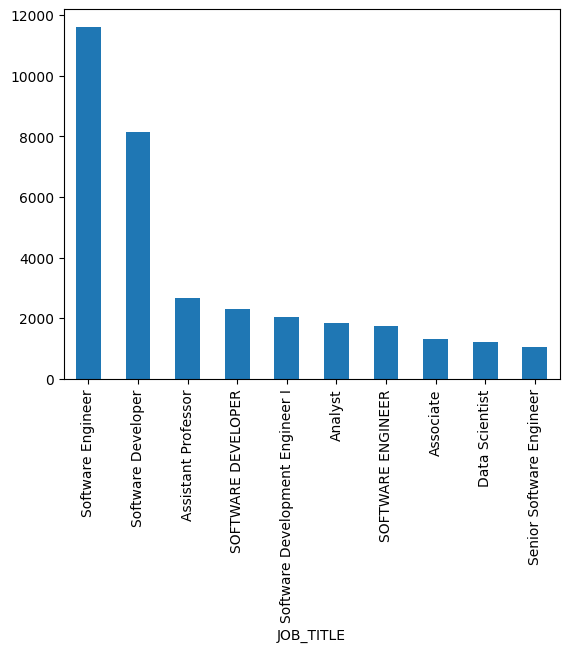

In [95]:
certified_h1b['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

In [96]:
# Let's convert all of the entries in the JOB_TITLE column to title case
certified_h1b['JOB_TITLE'] = [x.title() for x in certified_h1b['JOB_TITLE']]

/var/folders/zy/1n1cqtl540n_747vnk5pgbrm0000gn/T/ipykernel_33020/3278227998.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



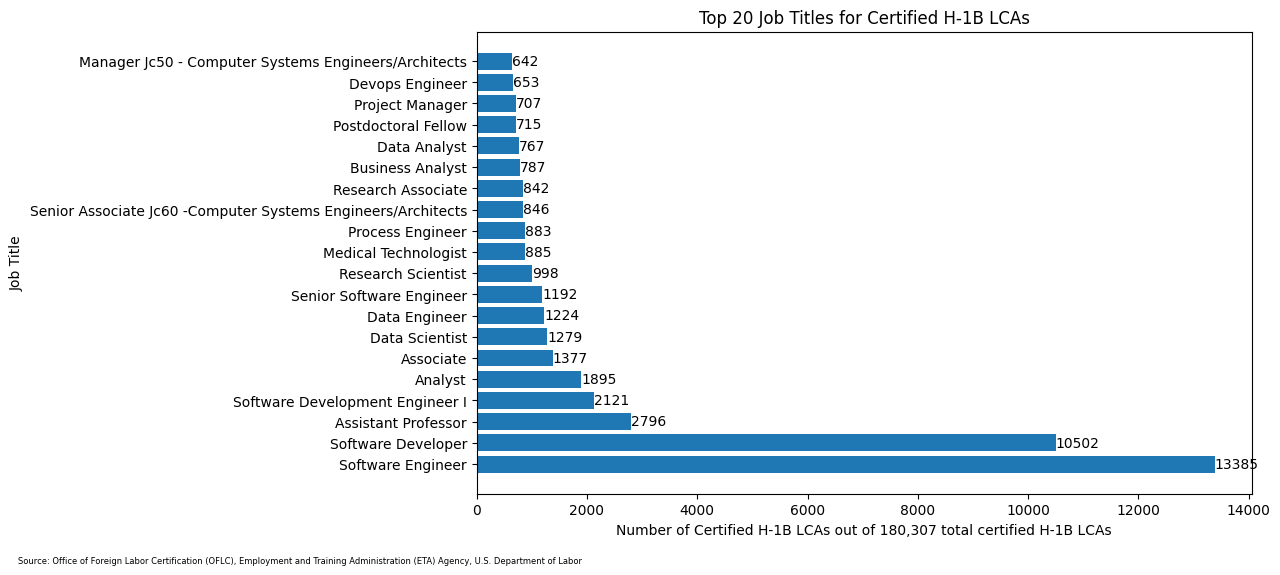

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(certified_h1b['JOB_TITLE'].value_counts()[0:20].index, certified_h1b['JOB_TITLE'].value_counts()[0:20].values);
ax.bar_label(ax.containers[0]);
ax.title.set_text('Top 20 Job Titles for Certified H-1B LCAs');
ax.set_ylabel('Job Title');
ax.set_xlabel(f'Number of Certified H-1B LCAs out of {certified_h1b.shape[0]:,} total certified H-1B LCAs');
ax.annotate(text='Source: Office of Foreign Labor Certification (OFLC), Employment and Training Administration (ETA) Agency, U.S. Department of Labor', xy=(0,0), xytext=(-330,-50), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points');


This doesn't even consider job titles such as "Principal Software Engineer" or "Lead Software Engineer".

Looking at the graph above, most of these roles fall into established STEM categories. Perhaps the roles that we can think about outside of STEM are the "Teacher" roles, "Postdoctoral Fellow" roles, and "Assistant Professor" roles. This begs the question, who is contributing the most to the LCAs that are filed for these roles? What fields or industries are they in?

Academia seems to be the most prevalent pathway for non-STEM people to stay in the U.S.

In [98]:
# I want to narrow down positions based on their relevance to STEM or non-STEM
# I will use the SOC codes for the job titles
# Let's see what those look like

certified_h1b['SOC_CODE'].unique()

array(['19-1042.00', '13-1111.00', '15-1252.00', '15-1251.00',
       '15-1299.00', '15-1299.08', '29-1216.00', '27-2022.00',
       '15-1244.00', '17-2051.00', '29-2011.00', '19-3051.00',
       '29-9099.00', '11-3121.00', '25-1052.00', '17-2141.00',
       '15-1253.00', '29-1031.00', '11-2021.00', '13-1199.00',
       '15-1211.00', '17-2112.00', '13-2054.00', '15-2051.01',
       '13-1041.07', '19-1029.02', '15-1299.05', '11-1021.00',
       '19-1032.00', '15-1243.01', '15-1242.00', '11-3021.00',
       '15-1243.00', '19-1029.01', '15-1299.09', '13-1082.00',
       '27-1021.00', '17-3011.00', '25-2031.00', '15-1254.00',
       '19-1022.00', '17-2061.00', '11-9041.00', '25-1126.00',
       '13-2011.00', '17-2112.02', '13-2099.04', '27-1011.00',
       '15-2051.00', '29-1141.00', '25-1021.00', '17-2072.00',
       '17-2112.03', '11-3031.00', '15-1212.00', '25-1011.00',
       '19-2031.00', '19-2012.00', '15-2041.00', '11-9033.00',
       '15-1255.00', '13-1081.00', '29-1051.00', '15-20

<Axes: xlabel='EMPLOYER_NAME'>

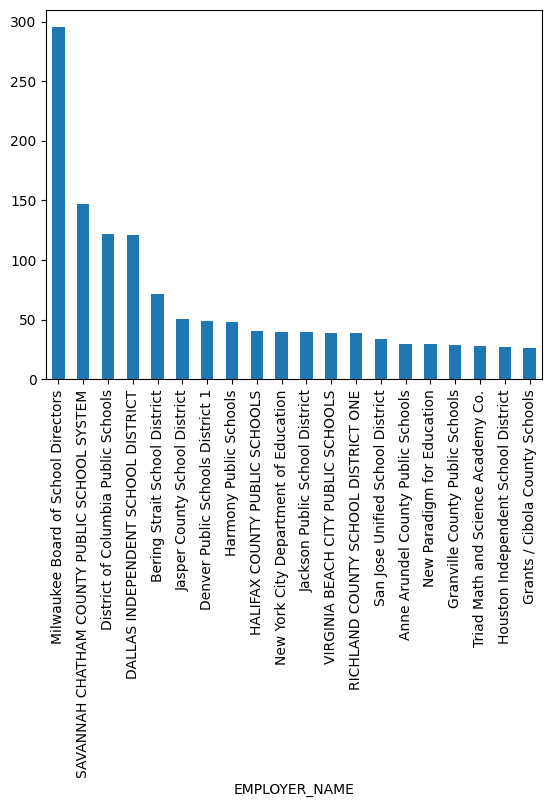

In [99]:
teachers = certified_h1b_renewed[certified_h1b_renewed['SOC_CODE'].str.startswith('25-20')]
teachers['EMPLOYER_NAME'].value_counts()[0:20].plot(kind='bar')

<Axes: xlabel='JOB_TITLE'>

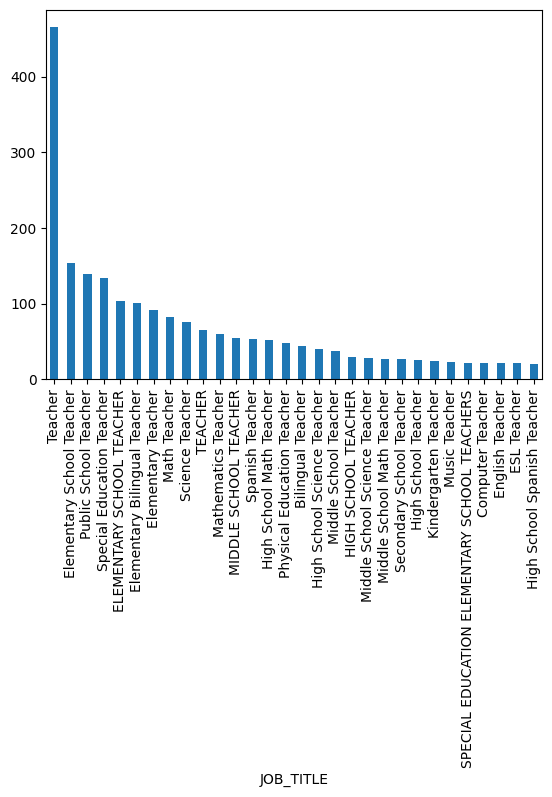

In [100]:
teachers['JOB_TITLE'].value_counts()[0:30].plot(kind='bar')

In [101]:
certified_h1b['SOC_CODE'].unique().size

736

In [102]:
certified_h1b['SOC_CODE'].nunique()

736

In [103]:
certified_h1b['SOC_TITLE'].nunique()

703

In [104]:
certified_h1b['SOC_TITLE'].unique()

array(['Medical Scientists, Except Epidemiologists',
       'Management Analysts', 'Software Developers',
       'Computer Programmers', 'Computer Occupations, All Other',
       'Computer Systems Engineers/Architects',
       'General Internal Medicine Physicians', 'Coaches and Scouts',
       'Network and Computer Systems Administrators', 'Civil Engineers',
       'Medical and Clinical Laboratory Technologists',
       'Urban and Regional Planners',
       'Healthcare Practitioners and Technical Workers, All Other',
       'Human Resources Managers', 'Chemistry Teachers, Postsecondary',
       'Mechanical Engineers',
       'Software Quality Assurance Analysts and Testers',
       'Dietitians and Nutritionists', 'Marketing Managers',
       'Business Operations Specialists, All Other',
       'Computer Systems Analysts', 'Industrial Engineers',
       'Financial Risk Specialists', 'Business Intelligence Analysts',
       'Regulatory Affairs Specialists',
       'Molecular and Cellula

In [105]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].value_counts()

SOC_TITLE
Software Developers                                         51112
Software Quality Assurance Analysts and Testers              4526
Software Developers, Non R&D                                  115
SOFTWARE DEVELOPERS                                           114
Software Quality Assurance Engineers and Testers              109
Software Developers, R&D                                       69
Software Quality Assurance Analysts and Testers, R&D            8
Software Quality Assurance Analysts and Testers, Non R&D        7
SOFTWARE QUALITY ASSURANCE ANALYSTS AND TESTERS                 4
Software Developer                                              2
SoftwareDevelopers                                              2
Software Quality Assurance Analyst/Testers                      2
SOFTWARE DEVELOPERS, APPLICATIONS, NON R&D                      2
Software Developers, Applications, Non R&D                      1
Name: count, dtype: int64

In [106]:
certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].size

56073

In [107]:
print(f"We have uncovered that the H-1B certified roles for new employment that contain the word \"software\" in them total to {certified_h1b[certified_h1b['SOC_TITLE'].str.contains('software', case=False)]['SOC_TITLE'].size:,} out of the total {certified_h1b.shape[0]:,} roles that were awarded certified status for an H-1B Labor Condition Application.")

We have uncovered that the H-1B certified roles for new employment that contain the word "software" in them total to 56,073 out of the total 180,307 roles that were awarded certified status for an H-1B Labor Condition Application.


In [108]:
# let's see how many full time positions that were applied for
data['FULL_TIME_POSITION'].value_counts()

FULL_TIME_POSITION
Y    634943
N      9664
Name: count, dtype: int64

## TODO: Time-series analysis by grouping LCA's on the datetime columns to examine patterns in how LCA submissions are made by employers

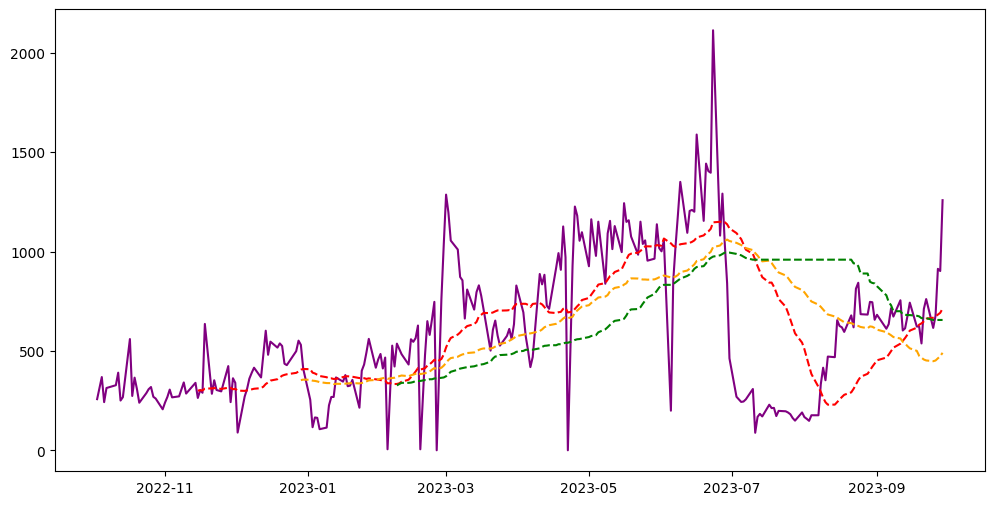

In [109]:
# Let's use the DECISION_DATE to determine how certified LCAs changed in their numbers over time by counting the number of records received each day for the entire year
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index(), linestyle='-', color='purple');
ax.plot(certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index().rolling(window=30).mean(), linestyle='--', color='red');
ax.plot(certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index().rolling(window=60).mean(), linestyle='--', color='orange');
ax.plot(certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index().rolling(window=90).median(), linestyle='--', color='green');

Count the number of records that appear in the data frame for a given date and label that value `count`. Create a table that whose records contain the date and the corresponding `count` value. Sort the table by the date from earliest to latest. Look back 30 `count` values, calculate the mean of those 30 `count` values, and record that mean in a table. Plot the means from this table on a graph.

In [120]:
%%time

fig = go.Figure(go.Scatter(x=certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index().index, 
                           y=certified_h1b_renewed['DECISION_DATE'].value_counts().sort_index().values,
                           mode='lines',
                           name='Daily Counts',
                           line=dict(color='red')))
fig.show()

CPU times: user 18.5 ms, sys: 29.8 ms, total: 48.3 ms
Wall time: 80.5 ms


In [111]:
fig = go.Figure(go.Scatter(x=colleges_and_universities['DECISION_DATE'].value_counts().sort_index().index, y=colleges_and_universities['DECISION_DATE'].value_counts().sort_index().values, mode='lines', name='Daily Counts'))
fig.show()

In [112]:
# Display the current time
print("Notebook run time:", datetime.datetime.now())

Notebook run time: 2024-05-28 21:14:28.551799
